#1.Import libraries

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FormatStrFormatter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#2.Basic readings

In [3]:
df = pd.read_csv('./Covid Data.csv')

In [4]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
df.shape

(1048575, 21)

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
df.columns.values

array(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU'], dtype=object)

In [9]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

#3.Data cleaning


In [10]:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [11]:
# Check duplication percentage:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

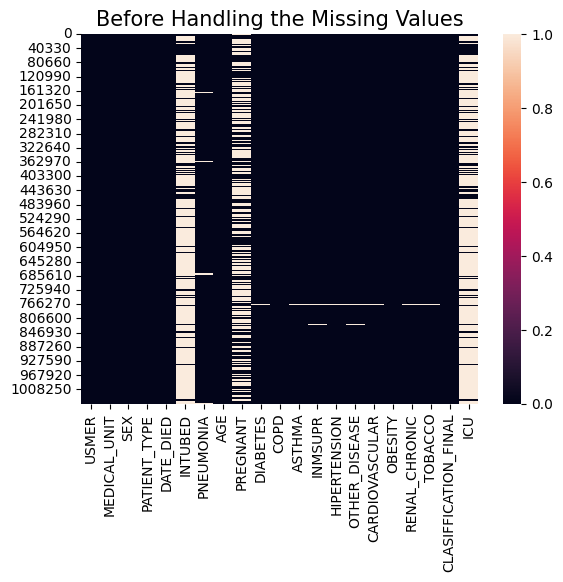

In [12]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [13]:
df.describe().T.drop('count', axis = 1)


,mean,std,min,25%,50%,75%,max
USMER,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


As we have seen above, ICU, INTUBED and PREGNANT are the three columns that have lots of missing values (97,98,99)


##1.cleaning pregant

In [14]:
df.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [15]:
df[(df['SEX'] == 2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [16]:
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [17]:
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

We can clearly see the values of 97 are of missing values come from the male and the 98% is come from the female

So obviously we can replace all the corresponding values to the male section (97) with (2) because male can't be pregnant

Some females have 98 which is a missing value, so we change all the 98's in PREGNANT to NAN. Currently 1 represents True and 2 represents False.

To change the boolean values to the conventional way, we change the 2's to 0's.

In [18]:
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(97, 2)
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(98, np.NAN)
# df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(2, 0)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2.0,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,2.0,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,2.0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2.0,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,2.0,1,...,2,2,1,2,2,2,2,2,3,97


Some columns contain 3-4 unique values when it should be a boolean: YES or NO. We replace all 97's, 98's, and 99's to NAN because they are missing values. The 1's mean YES and 2's mean NO, so we change 2's to 0's, the conventional way to represent Boolean values.

In [19]:
# var = df.columns[(df.nunique() == 3) | (df.nunique() == 4)].tolist()
# df.loc[:, var] = df.loc[:, var].replace([97, 98, 99], np.NAN)
# df.loc[:, var] = df.loc[:, var].replace(2, 0)

# df.head()

##2.cleaning date_died


In [20]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

DATE_DIED is represent as a pandas date format of when the patient died. If we have 9999-99-99 values, that means this patient is alive. Since our goal is to build models that predict surival rate given a patient's characteristics, we will change the DATE_DIED to 0 if the patient is alive or 1 if the patient died.

In [21]:
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)
#df.drop(columns='DATE_DIED', inplace=True)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,03/05/2020,97,1,65,2.0,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,2.0,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,2.0,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2.0,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,2.0,1,...,2,1,2,2,2,2,2,3,97,1


In [22]:
# df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [23]:
# df['DATE_DIED'] =  pd.to_datetime(df['DATE_DIED'])

In [24]:
df['DATE_DIED'].isnull().sum()

0

##3.cleaning ICU

In [25]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [26]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which again can not be telled or predicted.



So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ICU

In [27]:
df['ICU'].replace (97, 2, inplace = True)

In [28]:
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

##4.cleaning INTUBED

In [29]:
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [30]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


Again and as predicted it's the same as the ICU case.

So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be connected to the ventilator.

In [31]:
df['INTUBED'].replace (97, 2, inplace = True)

In [32]:
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

So, all the rest of these missing values (values of 98 & 99) can't be predicted (at least for now) as they will affect our analysis, which is based on true and actual real life values.

In other words, we can't fill them by random using any filling (imputation) technique

In [33]:
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [34]:
print('Percentage of NAN values')
for col in df.columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[col].isna().sum()/len(df)*100))

Percentage of NAN values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>       0.70%
PNEUMONIA            =>       1.53%
AGE                  =>       0.02%
PREGNANT             =>       0.36%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>       0.71%
DIED                 =>       0.00%


In [35]:
df.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DIED                        0
dtype: int64

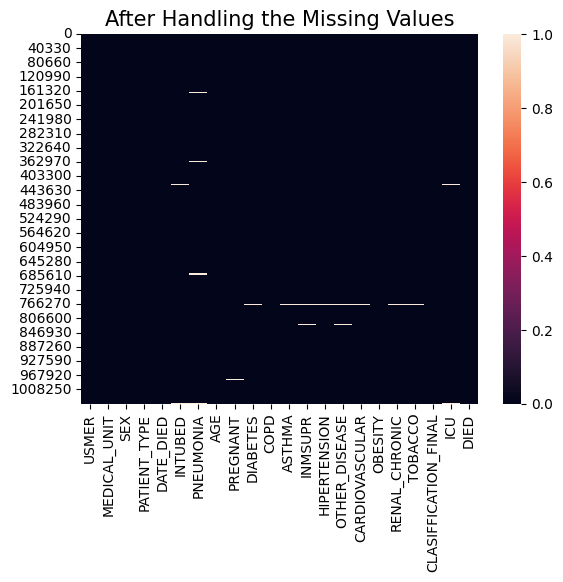

In [36]:
sns.heatmap(df.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

check again the data

In [37]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


As we can see most of the patients tend to not having any of the diseases, with very minimal of deaths.

#4.Data analysis

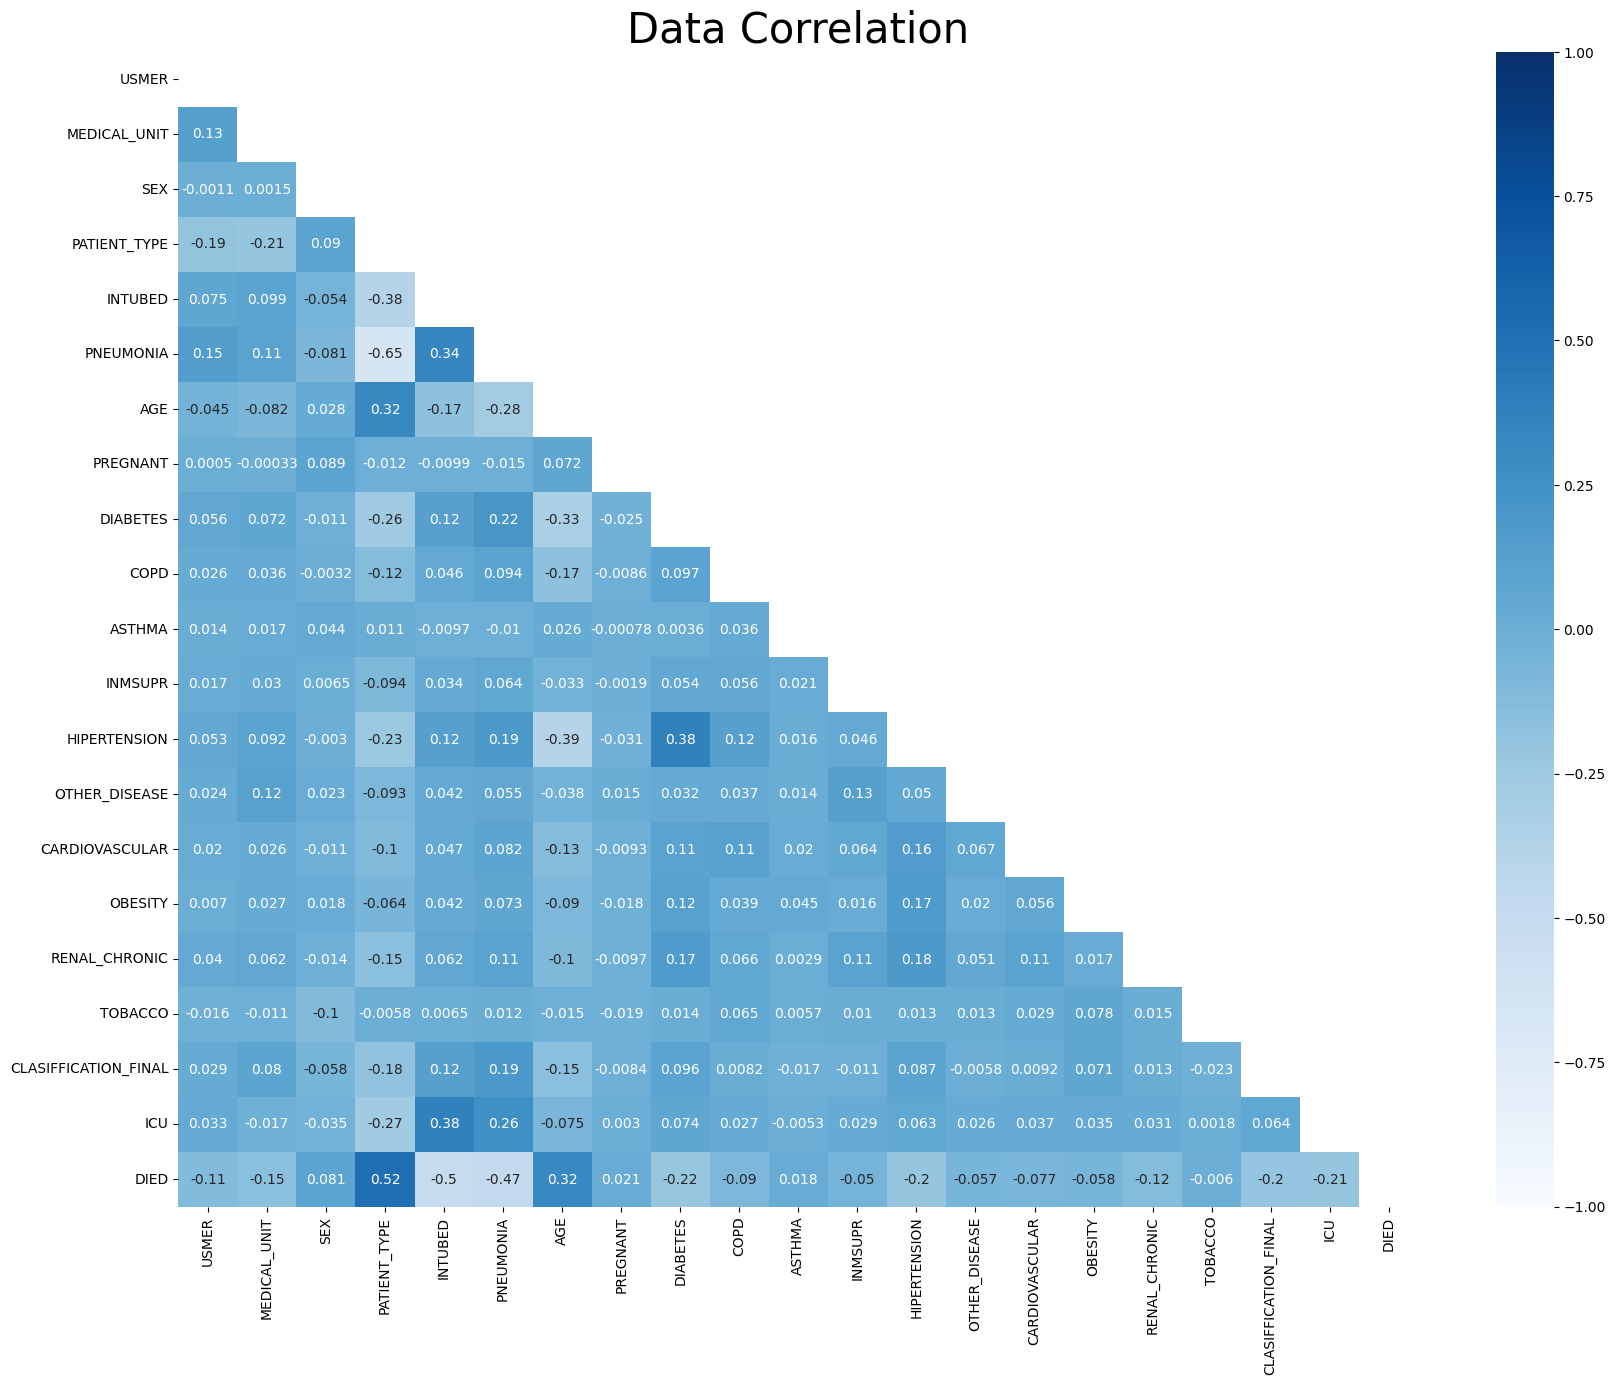

In [38]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

As colors go darker that indicates positive correlation, and as they go lighter that indicates negative correlation.
Also as the darkness or the lightness increases that indicates the increasing of the strength of the corresponding correlation

In [39]:
df_med_cond = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med_cond

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [40]:
df_med_cond.duplicated(keep = False).sum()

1046563

We can see that there are 1,046,563 patients with similar conditions split into some groups of patients with the same conditions

##1.How many have died?

In [41]:
dict(df['DIED'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

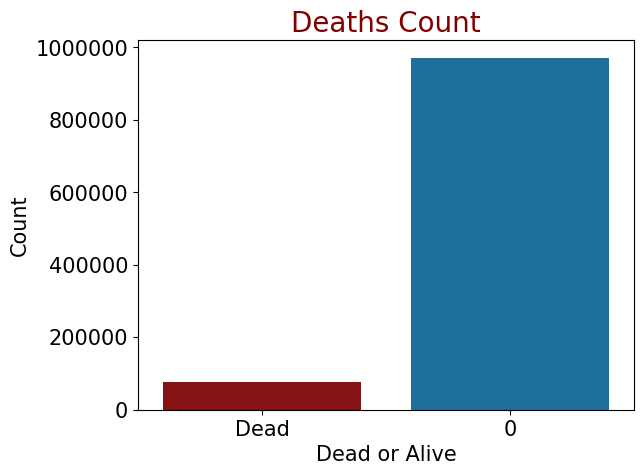

In [42]:
D = df['DIED']
D = D.replace(1, "Dead")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

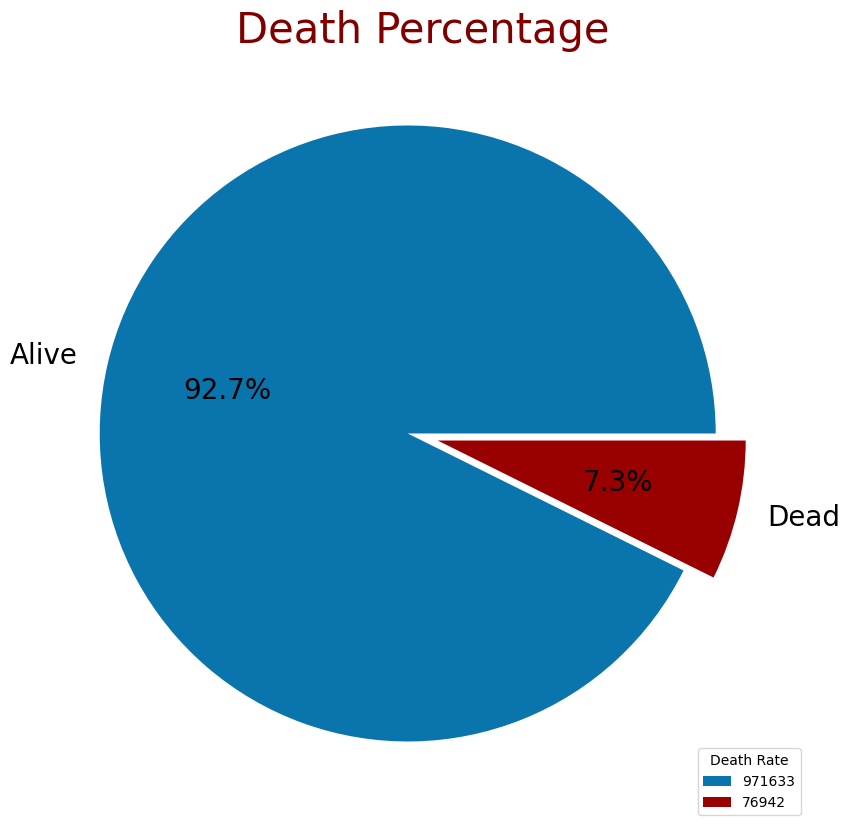

In [43]:
labels = ["Alive", "Dead"]
sizes = df['DIED'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DIED'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

We can see that 76,942 patients have died representing 7.3% of the total number of patients in our dataset

##2.Did they all have the same results?

In [44]:
df_dead = df[df["DIED"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,18/07/2020,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,26/07/2020,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,27/07/2020,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,29/07/2020,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [45]:
df_dead["CLASIFFICATION_FINAL"].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

We can see that we have dead patients with all "Classification" values starting from 1 till we go to 7, meaning we have dead people who were not diagnosed with Covid 19, and hence we can say that the dead patients didn't have the same results with a majority of whom were being diagnosed with Covid 19

##3.What is the percentage of Covid carriers among those dead patients?

In [46]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [47]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

<ipython-input-47-5d2618c6c6f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)


In [48]:
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,Covid_or_Not
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1,Not a Covid 19 Carrier
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,Not a Covid 19 Carrier
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,18/07/2020,1.0,1.0,73.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047636,1,13,2,1,26/07/2020,2.0,1.0,82.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047637,1,13,1,1,27/07/2020,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier
1047638,1,13,2,2,29/07/2020,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,A Covid 19 Carrier


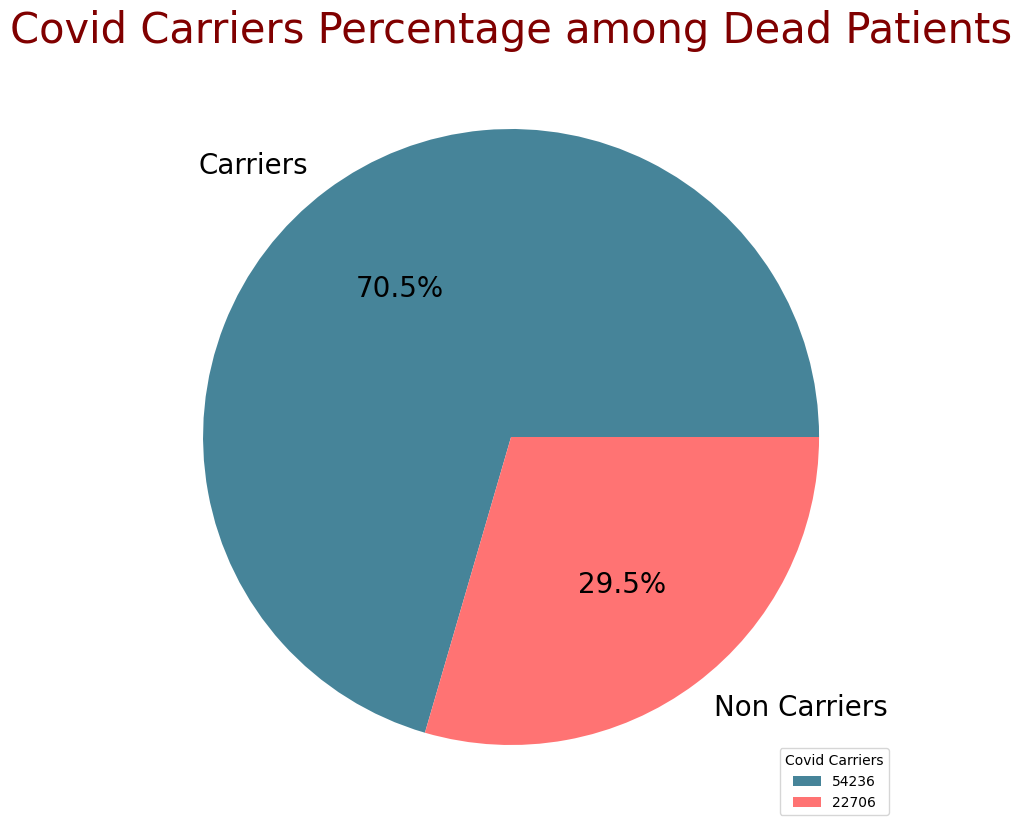

In [49]:
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [50]:
df_dead["Covid_or_Not"].value_counts()

A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

We can see that there are 54,236 patients who were carriers of Covid 19 among the dead with a percentage of 70.5%.
That indicates the horrifying effect of the pandemic on the death rates back then!!

##4.What about the percentage of covid carriers among the patients?

In [51]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

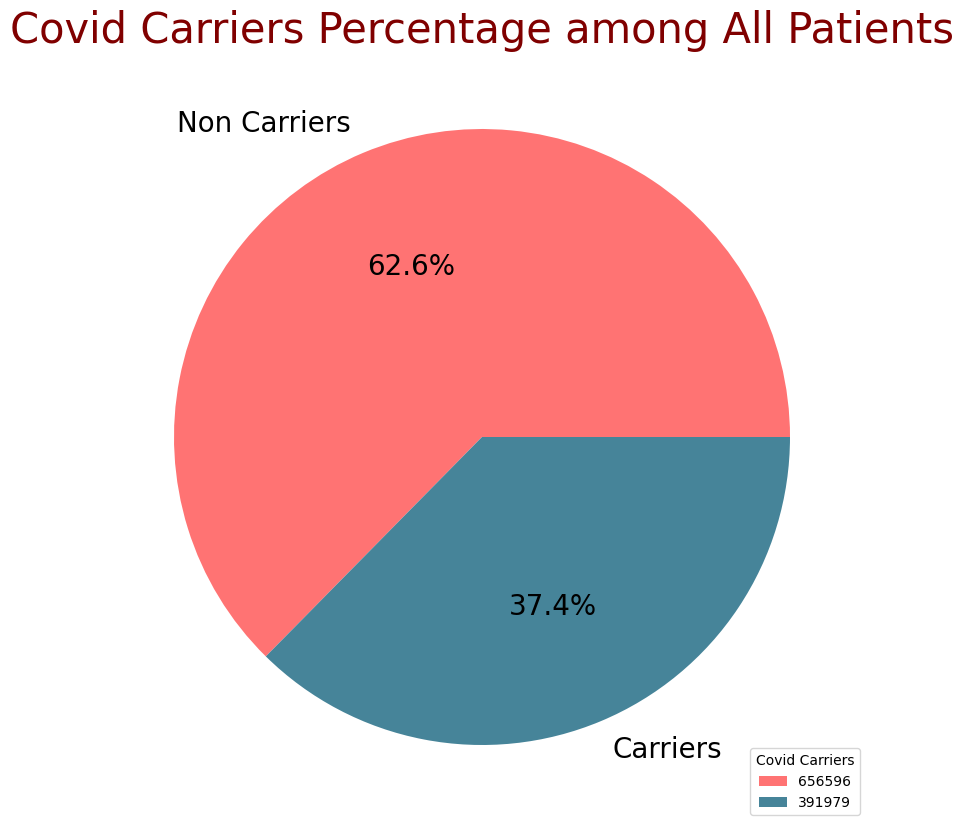

In [52]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [53]:
df["Covid_or_Not"].value_counts()

Not a Covid 19 Carrier    656596
A Covid 19 Carrier        391979
Name: Covid_or_Not, dtype: int64

We can see that there are 391,979 patients who were carriers of Covid 19 among all patients with a percentage of 37.4%.
That indicates that the majority of the patients were non carriers of Covid 19

##5.What is the percentage of death among those carriers?

In [54]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [55]:
Covid_deaths["DIED"].value_counts()

0    337743
1     54236
Name: DIED, dtype: int64

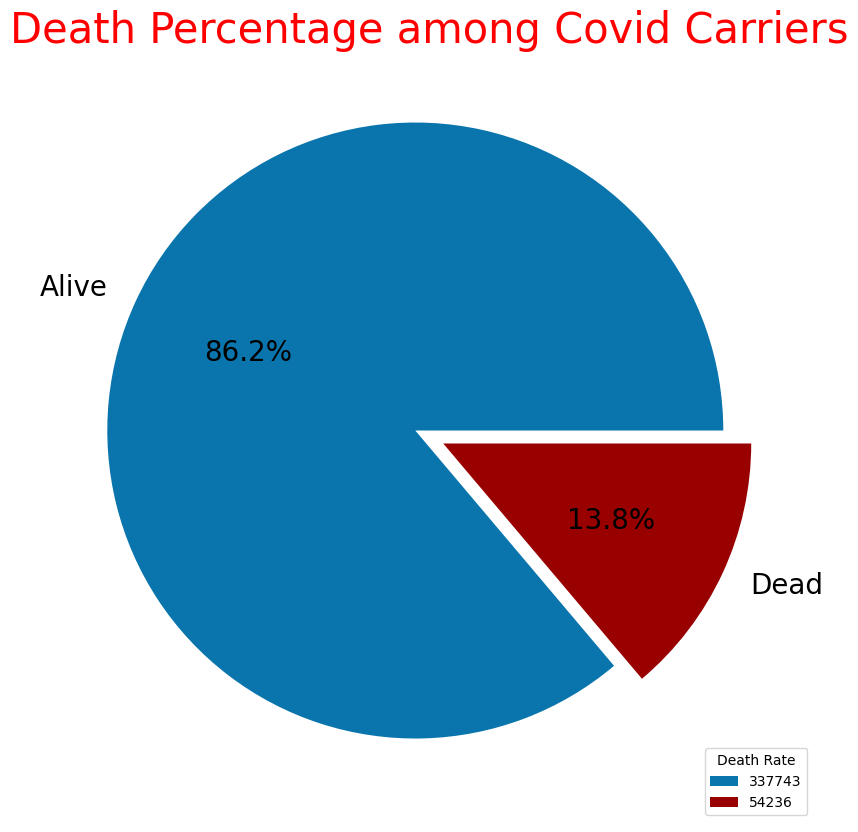

In [56]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DIED'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DIED'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

Here we can see that the 54,236 patients with Covid 19 who have died, reperesented only 13.8% of all the carriers, which means that 86.2% were treated successfully, and the treatment was going well to a certain degree back then accros the world.

##6. Does age has impact?

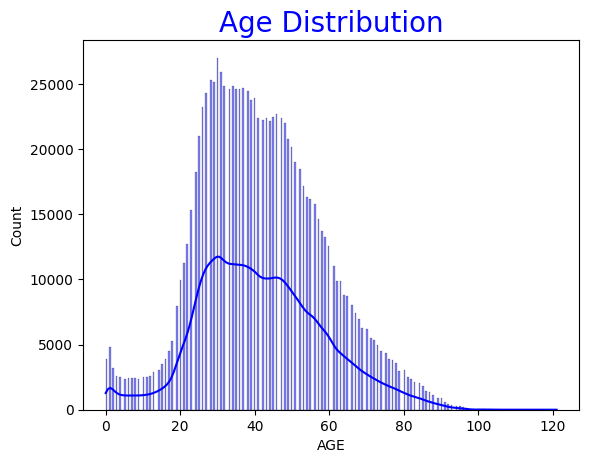

In [57]:
#check age distribution
sns.histplot(x=df.AGE, kde = True, color = "blue")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

We notice that the majoriy are of people in their 20s up to late 50s

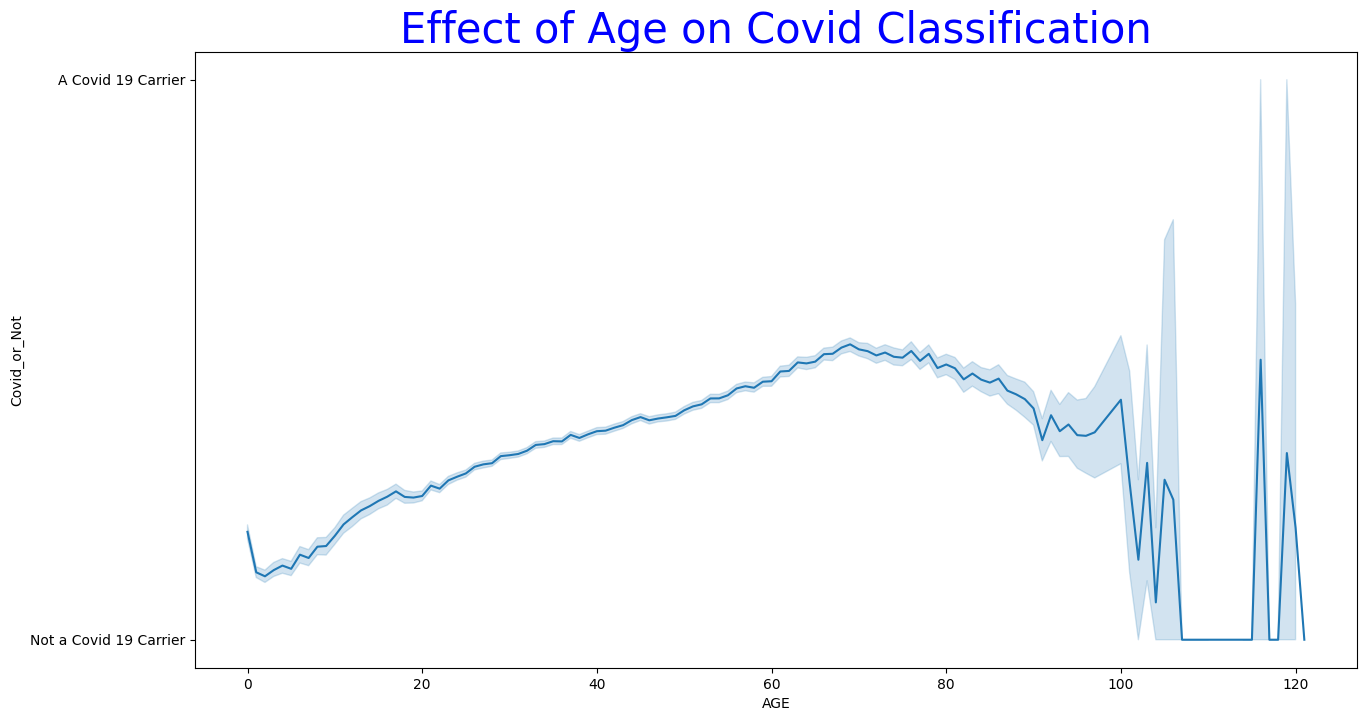

In [58]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

As we can see that as age increases the probability of getting diagnosed with Covid increases (with the exception of the suspected missing values we've already discussed of ages between 100 and 120), which proves that indeed age has an impact

##7.Does obesity has impact?

In [59]:
df_mod = df.copy()

In [60]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

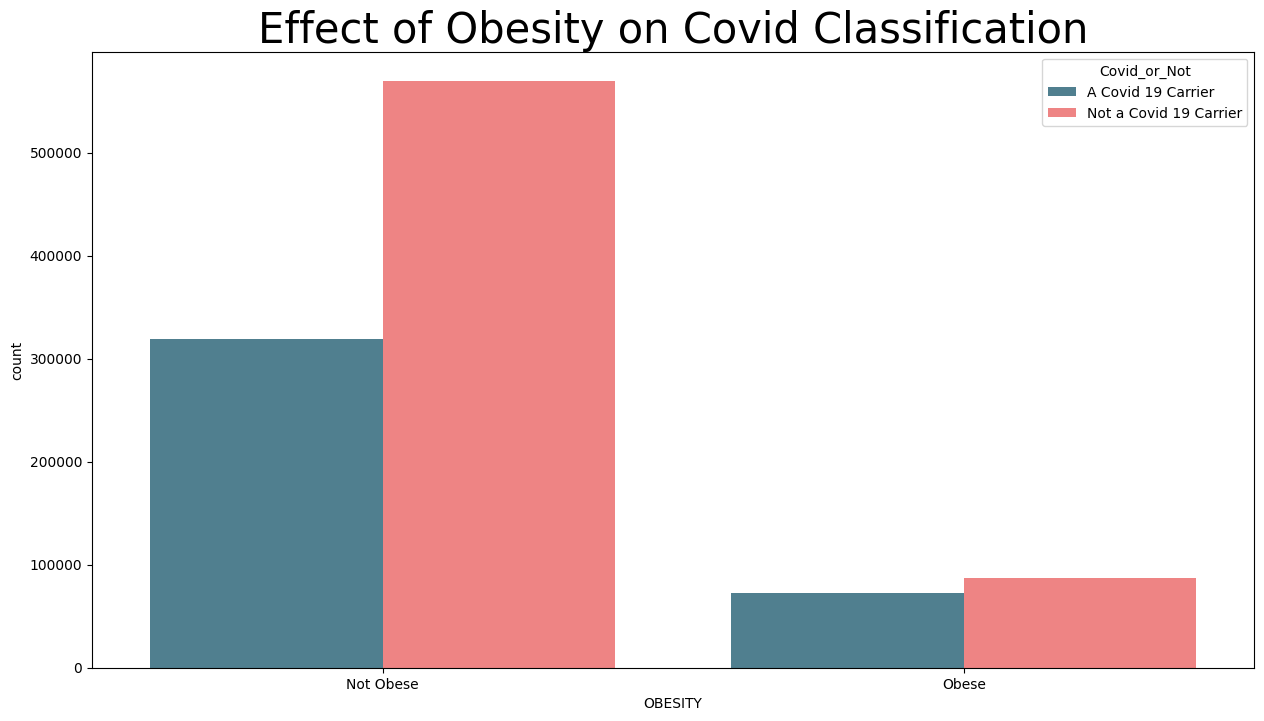

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="OBESITY", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Obesity on Covid Classification', color = 'black', fontsize = 30)
plt.show()

We can see that for patients with obesity the ratio is so close although they are considered a minority; but that gives us the indication that the percentage of patients carrying the disease among them is pretty high, while for patients who don't suffer from obesity the ratio is about 1:2, meaning that for every 100 patients who are not suffering from obesity there is a chance for only half of them to carry Covid

So according to our analysis, people who are suffering form obesity are more likely to carry Covid

##8.Does gender has impact?

In [62]:
df_mod['SEX'] = ["Female" if i==1 else "Male" for i in df.SEX]

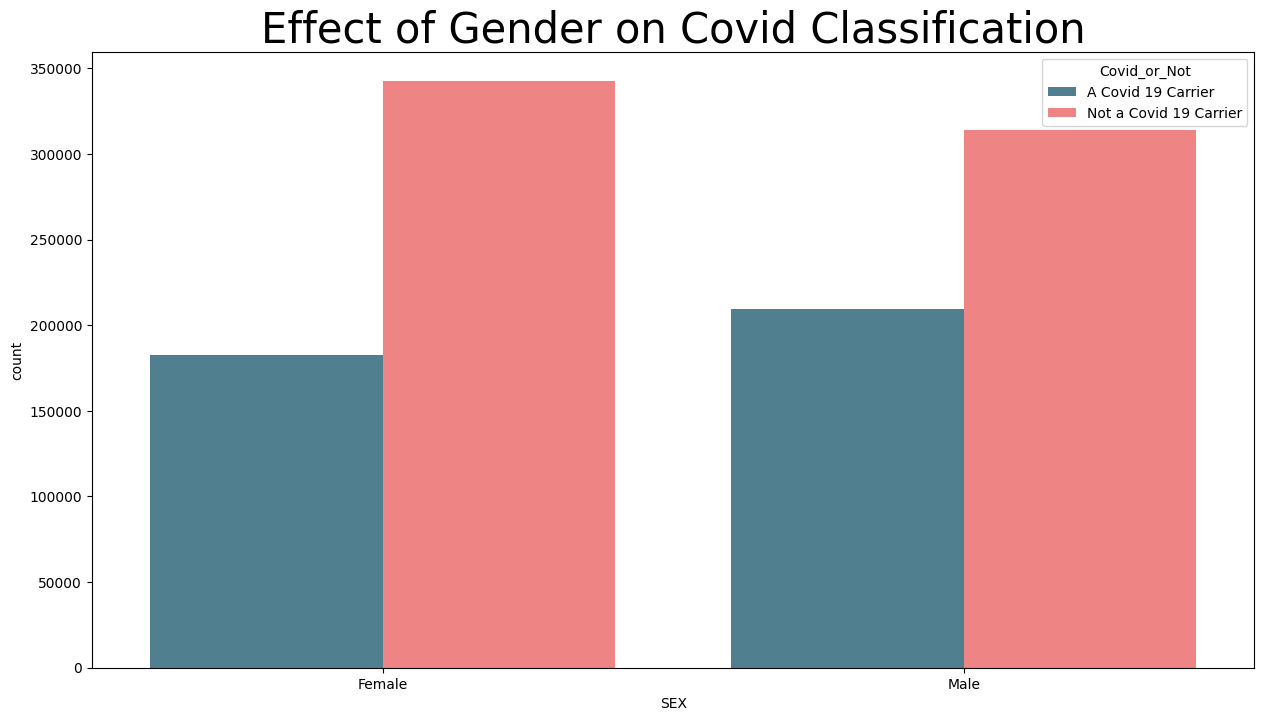

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

We can see that gender has no effect or impact, with males being slightly more likely to carry Covid than females but the difference doesn't really matter.

##9.Does pregnancy has impact?

In [64]:
df_preg = df[df["SEX"] == 1]
df_preg["PREGNANT"].value_counts()

2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64

In [65]:
df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]

<ipython-input-65-1e0a80e9e483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preg['PREGNANT'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.PREGNANT]


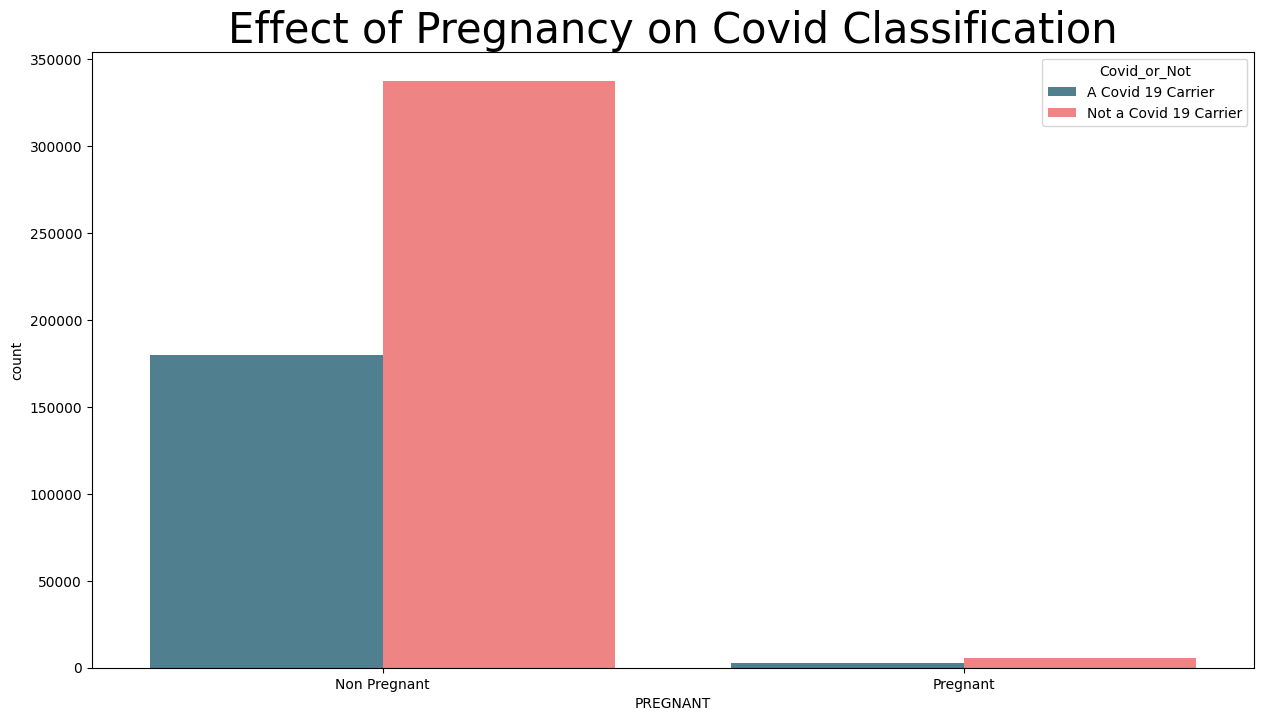

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

We can not determine from the above chart; as the pregnant ratio is not visible, during the low amount of pregnant females across our data.

In [67]:
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    5377
A Covid 19 Carrier        2754
Name: Covid_or_Not, dtype: int64

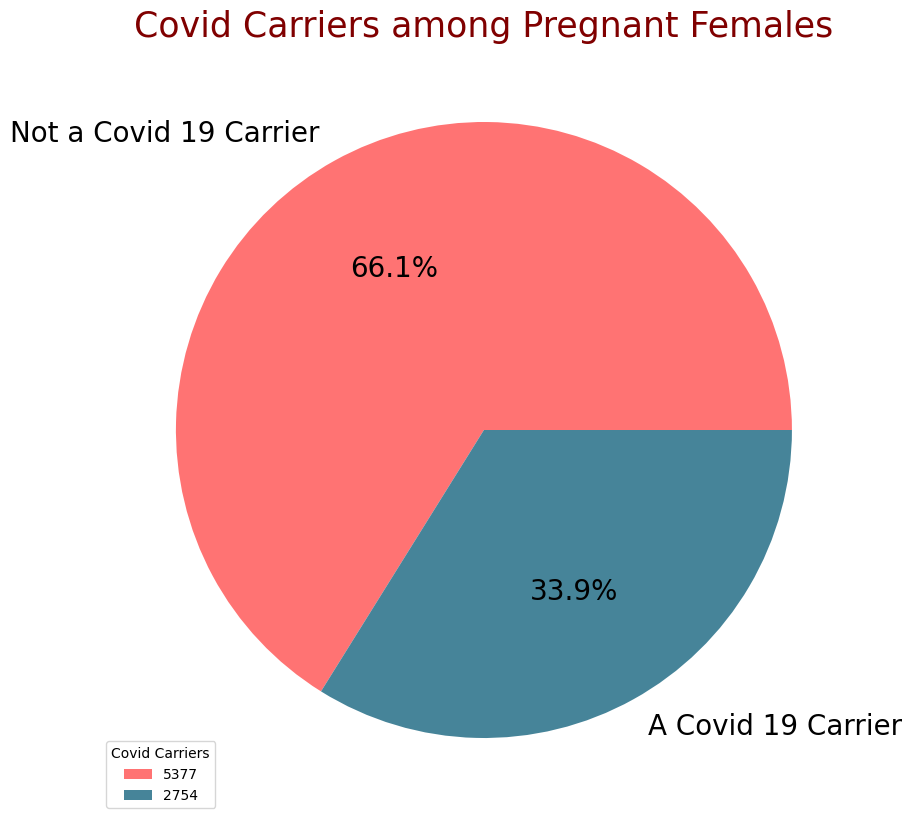

In [68]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [69]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

Not a Covid 19 Carrier    337197
A Covid 19 Carrier        179736
Name: Covid_or_Not, dtype: int64

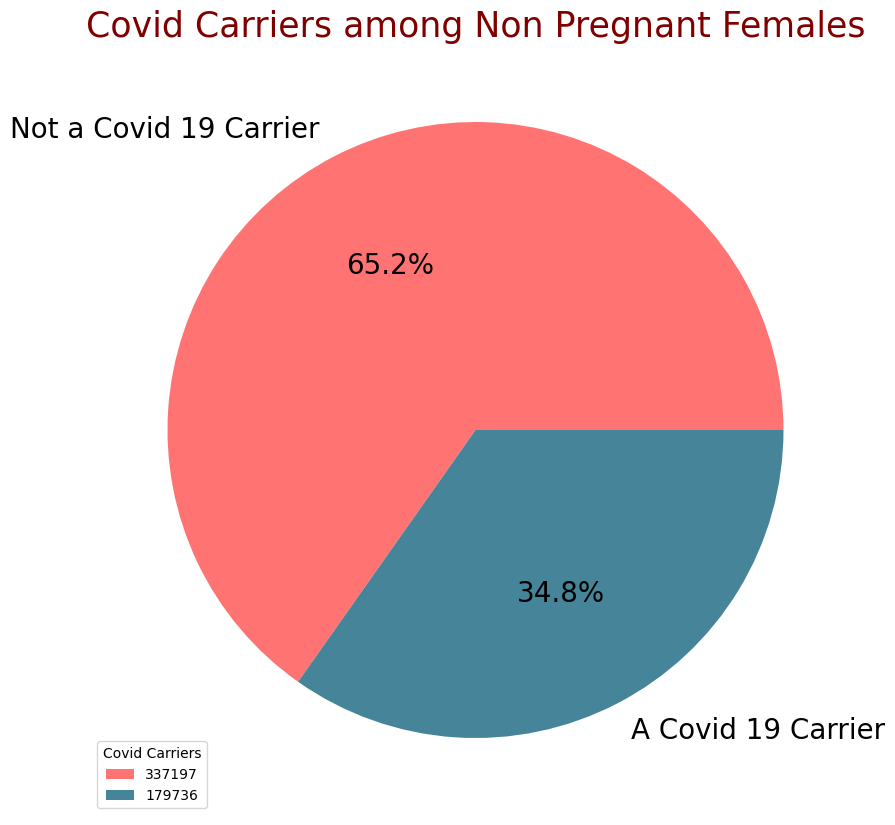

In [70]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

From the above two charts, we can see that both percentages are pretty much close.
So based on our analysis here, we can not see any impact from pregnancy on Covid classification.

##10.Do other diseases affect the patient classification?

In [71]:
df_med_cond

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DIED
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [72]:
df_diseases = df_med_cond.drop(columns = ["PREGNANT", "OBESITY", 'DIED'])

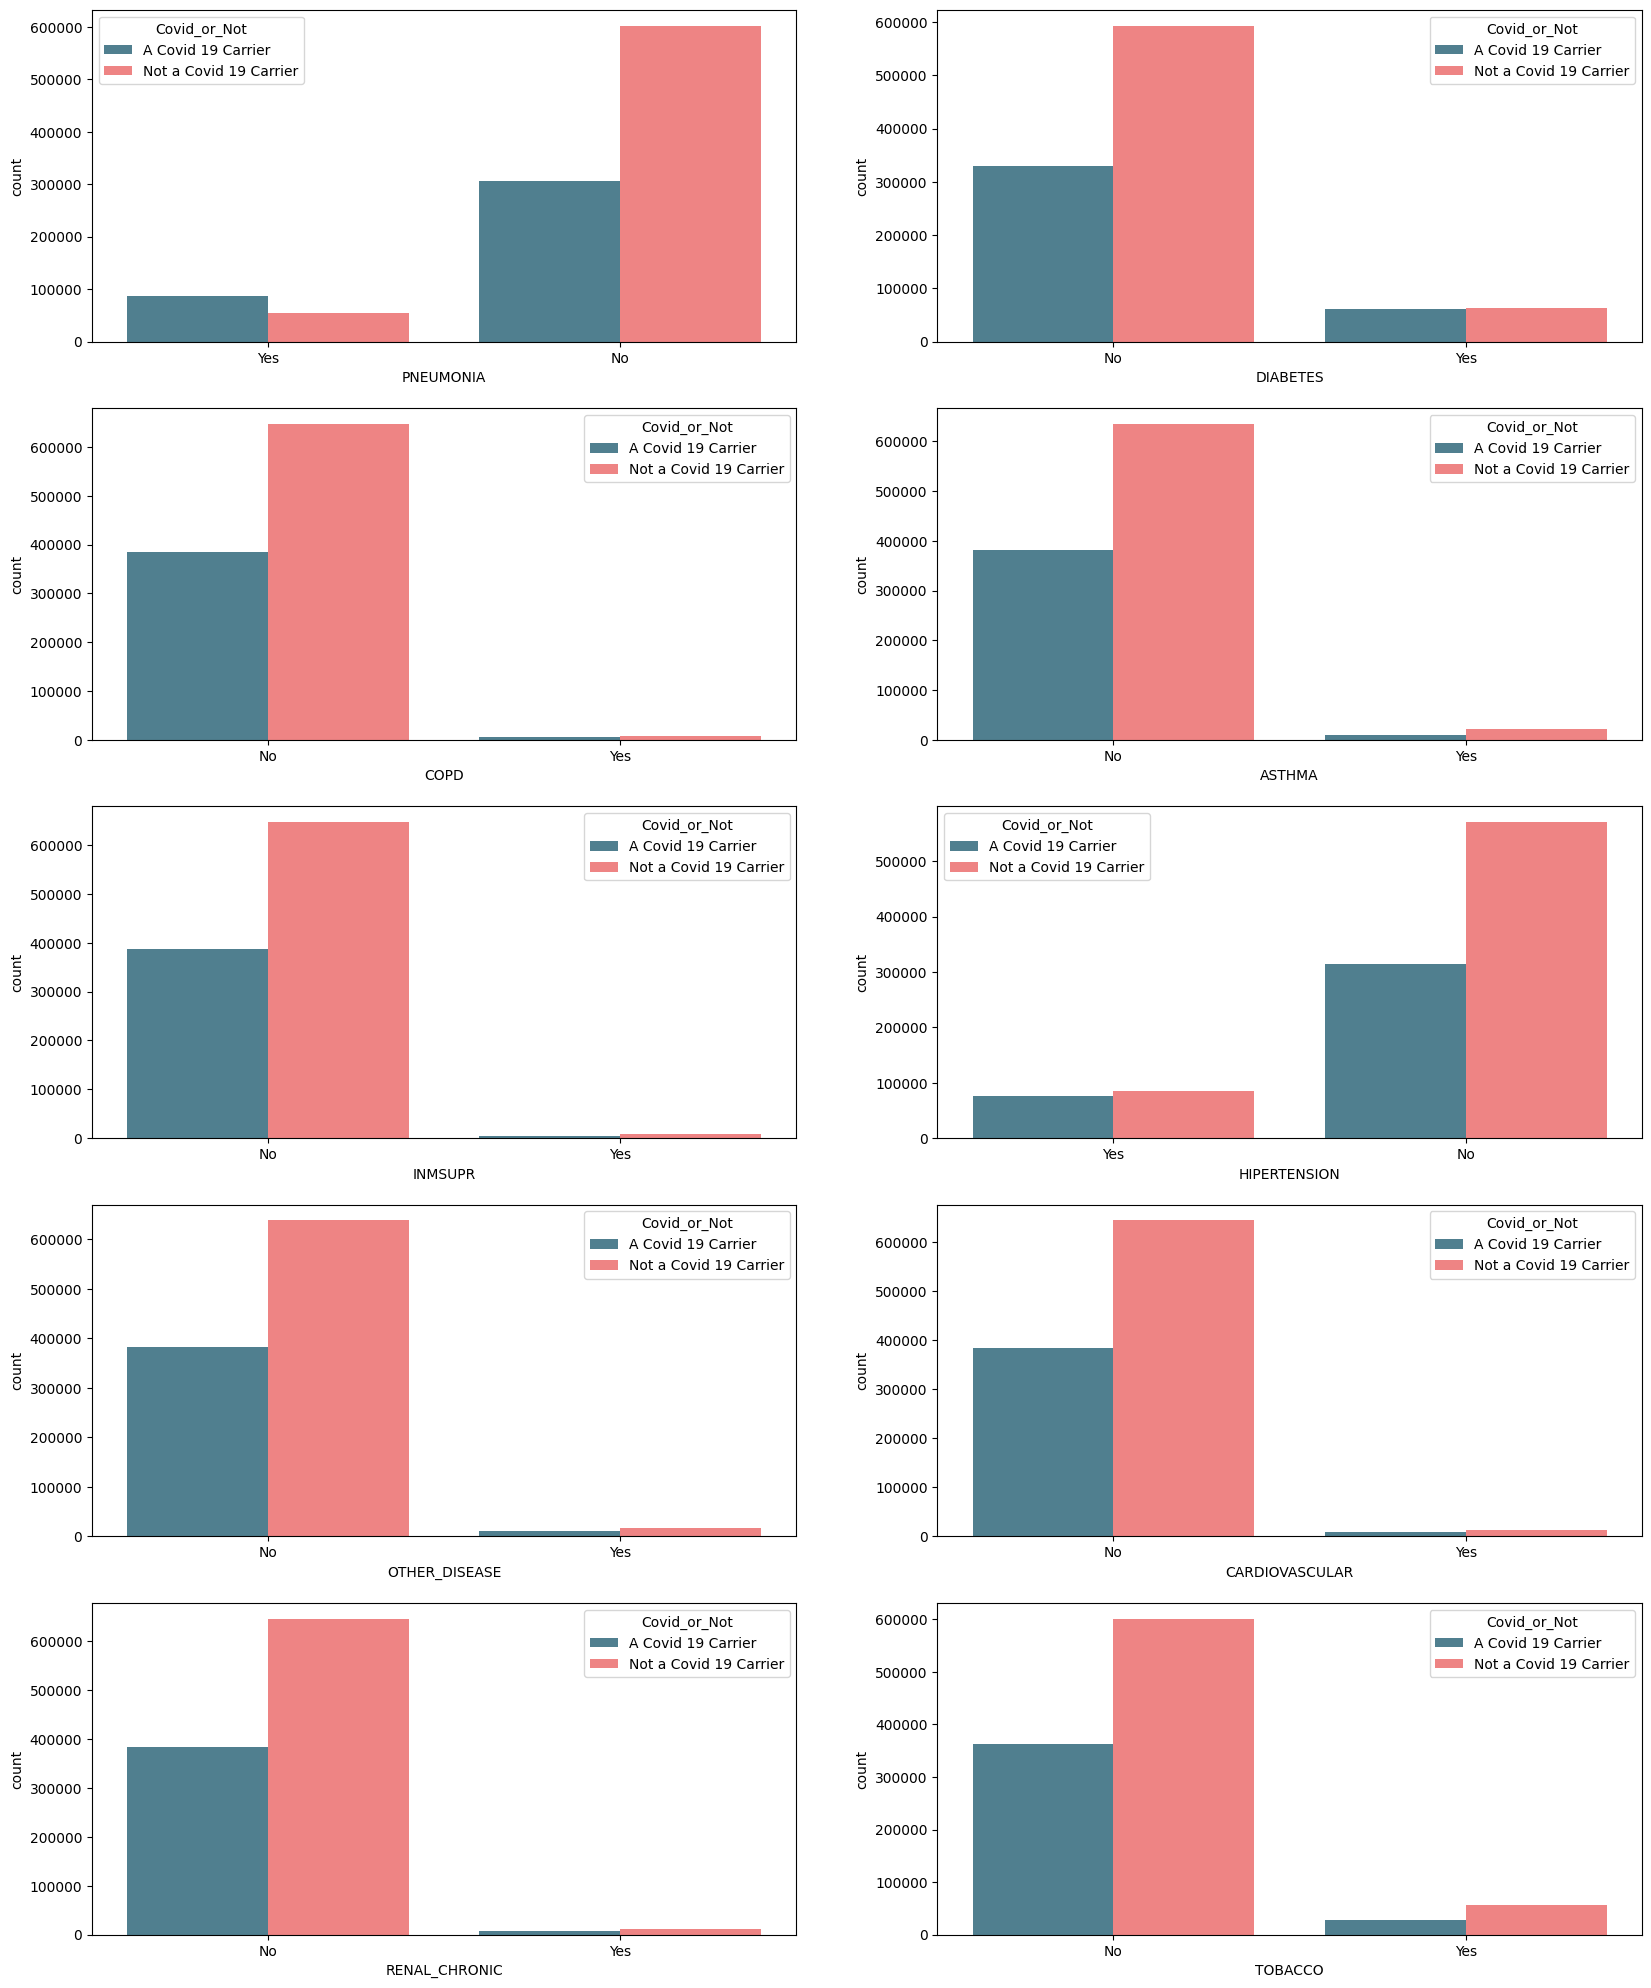

In [73]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

We noticed that the following diseases and habits have the highest impact:
1- Pneumonia
2- Hypertension
3- Diabetes
4- Tobacco usage
We also notice that Pneumonia patients are more likely to carry Covid with a higher ratio

Deeper into the classification

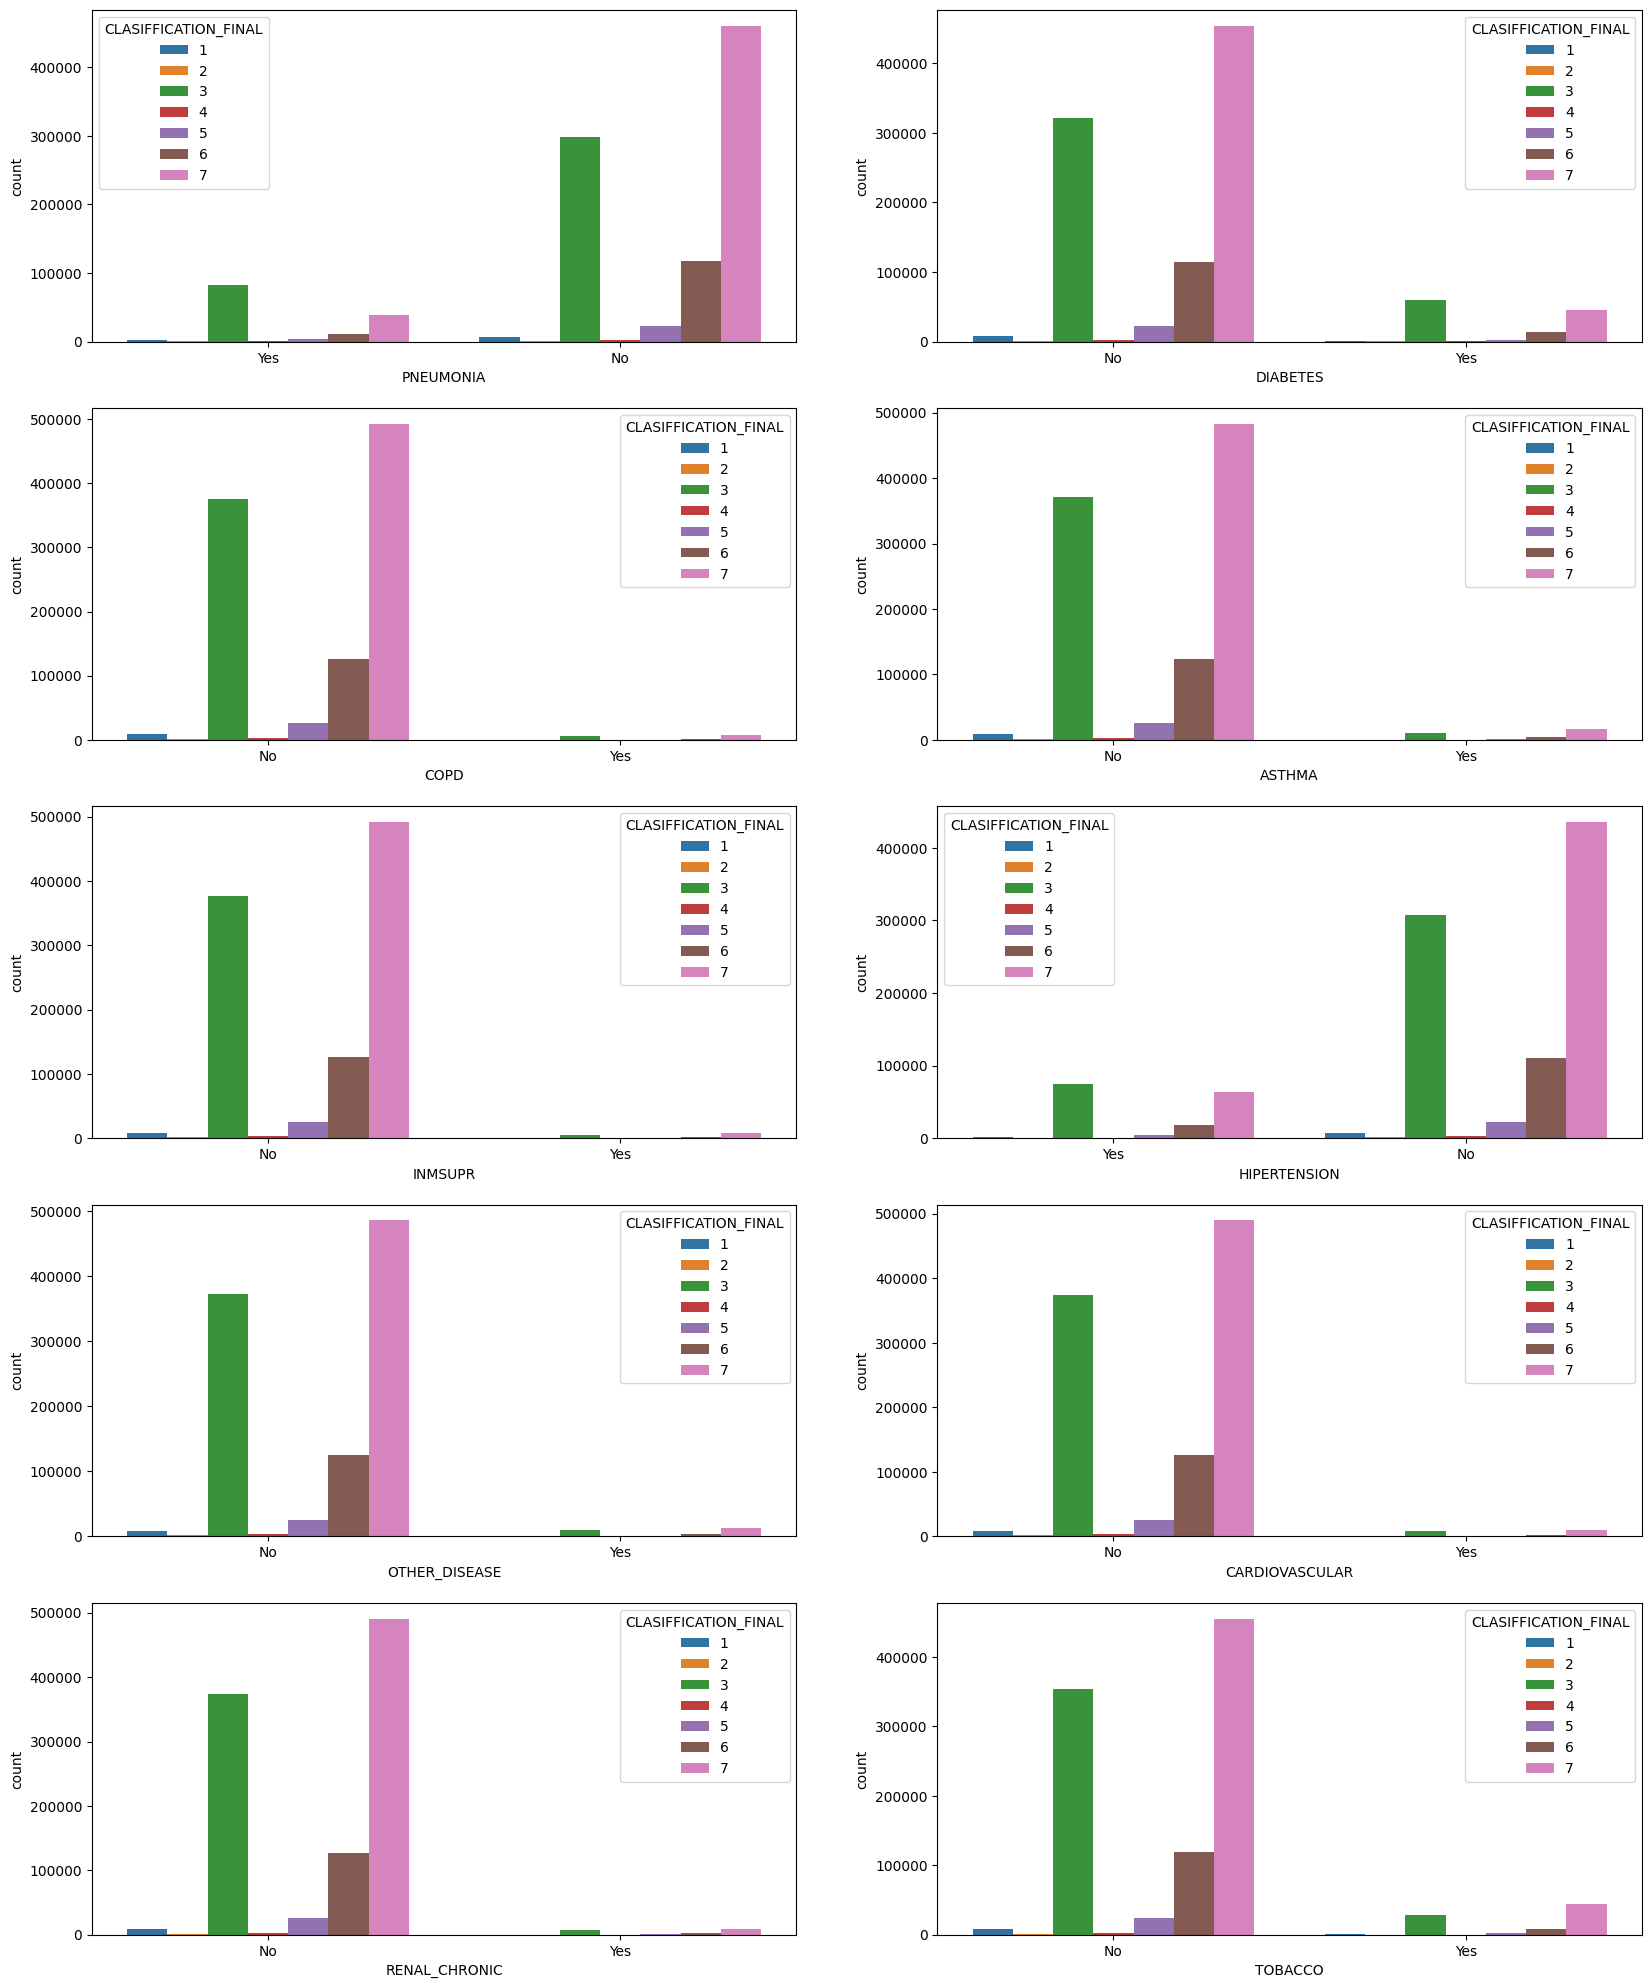

In [74]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

We can see that among all the patients of these diseases who also carry Covid, the 3rd classification is the highest by far

##11.How many patients were hospitalized?

In [75]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'Covid_or_Not'],
      dtype='object')

In [76]:
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

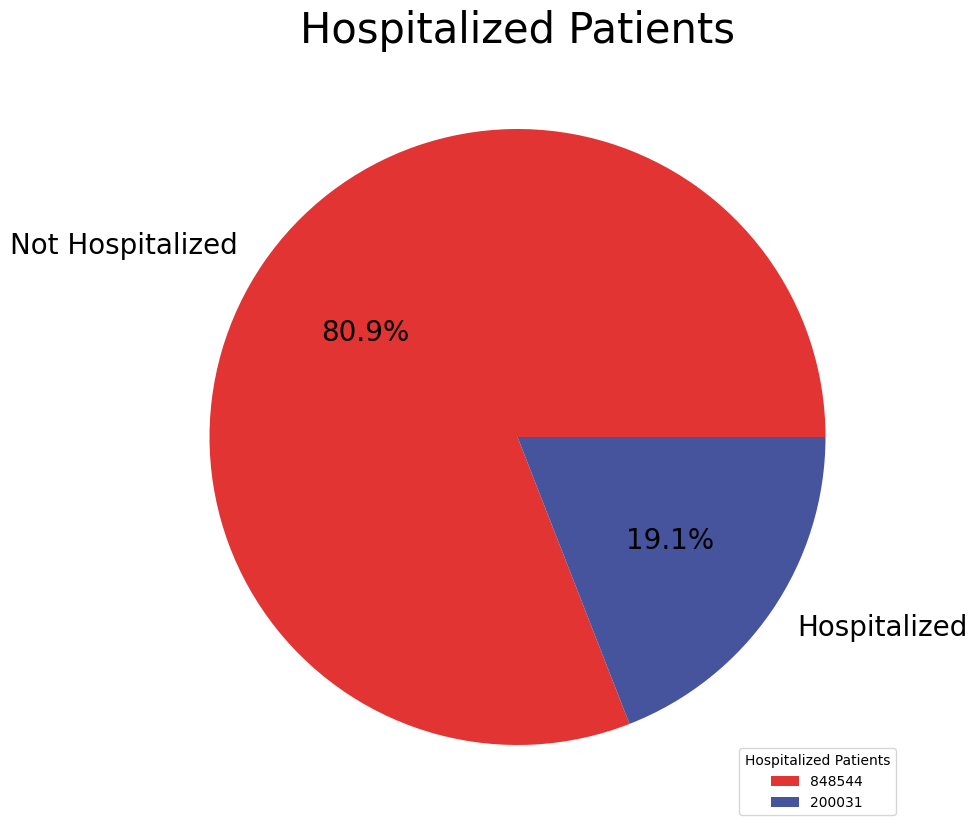

In [77]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

200,031 patients were hospitalized with a percentage of 19.1%

##12.How many of hospitalized people have died?

In [78]:
df_hosp = df[df['PATIENT_TYPE']==2]

In [79]:
df_hosp['DIED'] = df_hosp['DIED'].replace(1, "Dead")
df_hosp['DIED'] = df_hosp['DIED'].replace(0, "Alive")

<ipython-input-79-e9f45cfca091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DIED'] = df_hosp['DIED'].replace(1, "Dead")
<ipython-input-79-e9f45cfca091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['DIED'] = df_hosp['DIED'].replace(0, "Alive")


In [80]:
df_hosp['DIED'].value_counts()

Alive    129965
Dead      70066
Name: DIED, dtype: int64

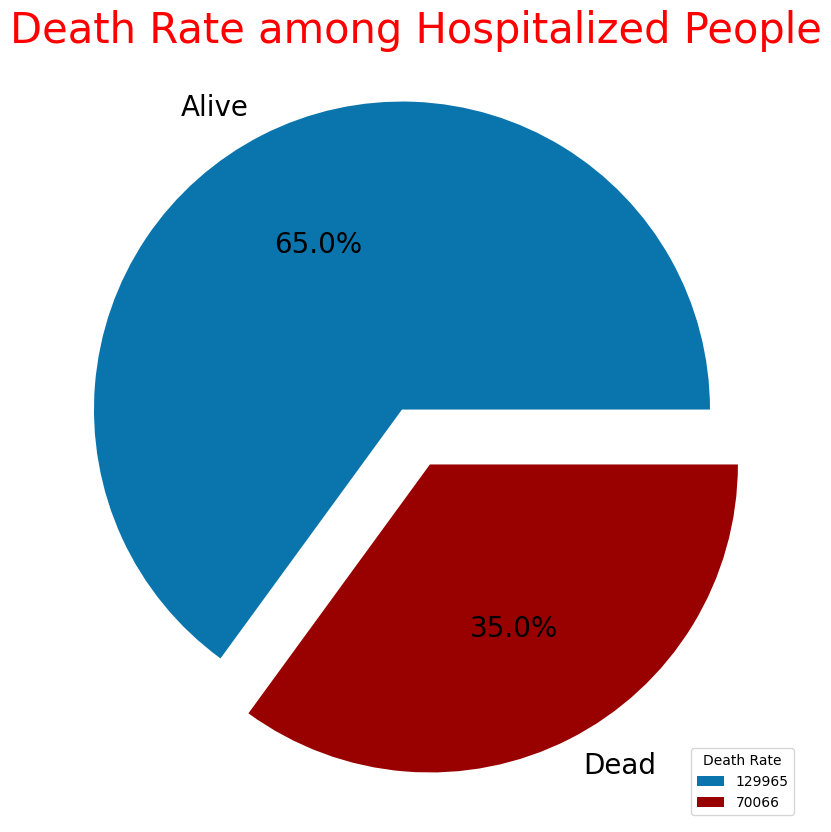

In [81]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DIED'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DIED'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

Among 200,031 total hospitalized patients, 70,066 patients have died unfortunately, with a percentage of 35% which is a great margin.

This indicates that the hospitalized people were at high risk and although we lost about 35% of them, we could due to treatment save the rest.

Let's check those 35% for their diseases and compare them to the rest (65%) to see if there were any indications that led to their unfortunate death

In [82]:
print(df_diseases.shape)
print(df_diseases.columns)

(1048575, 10)
Index(['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')


In [83]:
print(df_hosp.shape)
print(df_hosp.columns)

(200031, 23)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'Covid_or_Not'],
      dtype='object')


In [84]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
                                      'AGE', "PREGNANT", "OBESITY",'CLASIFFICATION_FINAL', 'ICU', 'DIED',
                                       'Covid_or_Not'])

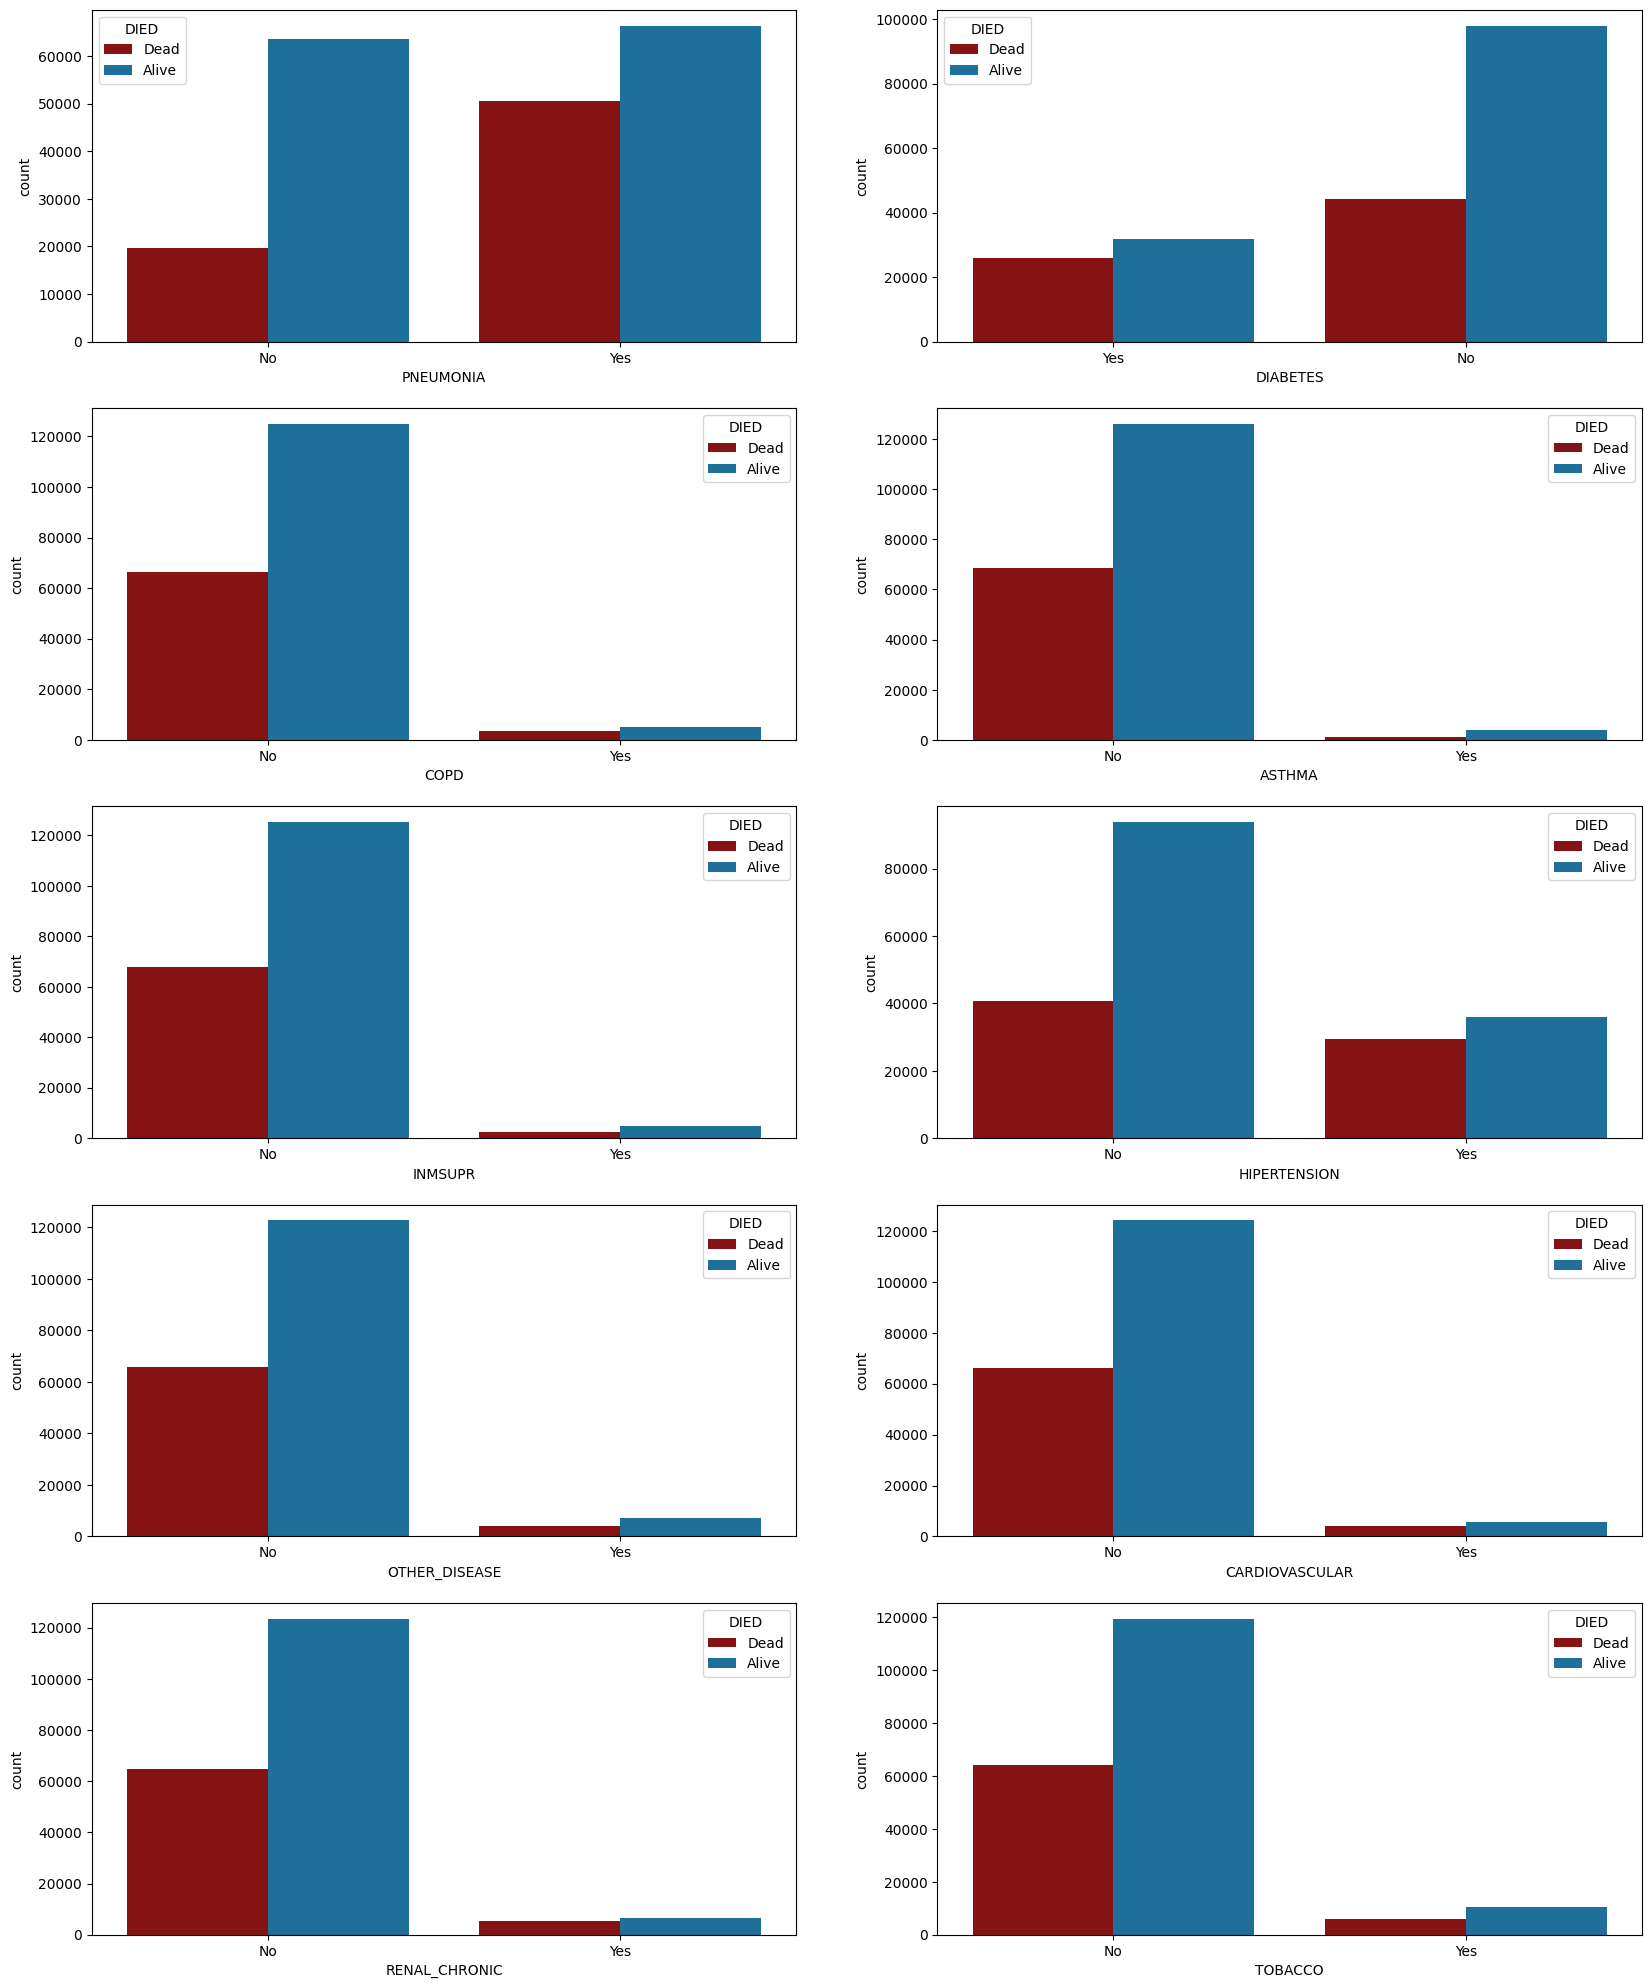

In [85]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DIED'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

We can see that most of those 35% didn't have any of those diseases except for those who had the following diseases:

1- Pneumonia

2- Hypertension

3- Diabetes

But we can also notice that the only disease that has a great impact on the death rate among the hospitalized patients is the "Pneumonia" disease, which makes perfect sense; as it's a lung diseas in the first place.

##13.How many of the dead patients were hospitalized?

In [86]:
df_dead.PATIENT_TYPE.value_counts()

2    70066
1     6876
Name: PATIENT_TYPE, dtype: int64

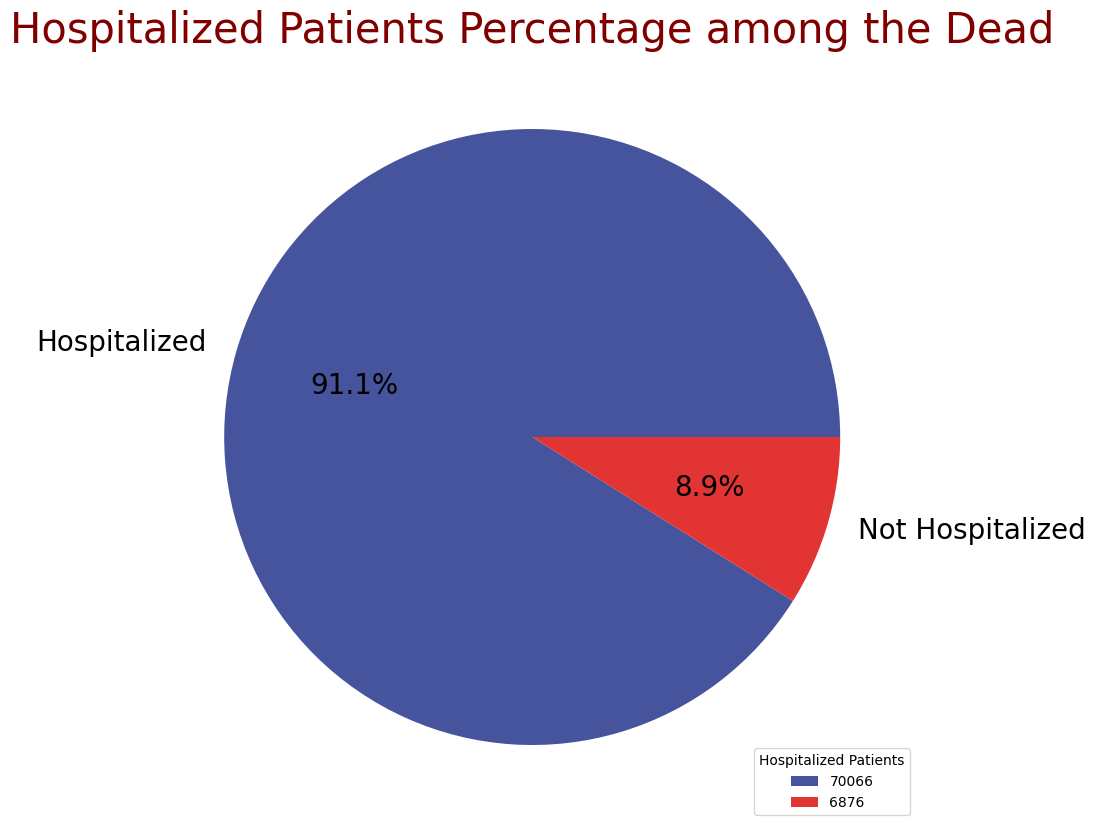

In [87]:
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

There are 70,066 patients who were hospitalized among the dead, with a great percentage of 91.1%, which makes sense and indicates that only few patients have died after sending them home just after getting classified.

##14.How many of those hospitalized patients had been admitted to the ICU?

In [88]:
df[(df['PATIENT_TYPE'] == 2) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,Covid_or_Not
16,2,1,1,2,9999-99-99,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,9999-99-99,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,9999-99-99,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
56,2,1,1,2,9999-99-99,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
57,2,1,1,2,9999-99-99,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,9999-99-99,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048270,2,13,1,2,9999-99-99,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048358,1,13,1,2,9999-99-99,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Not a Covid 19 Carrier
1048364,1,13,2,2,9999-99-99,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Not a Covid 19 Carrier


In [89]:
df.ICU.value_counts()

2.0    1024229
1.0      16858
Name: ICU, dtype: int64

In [90]:
df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

2.0    175685
1.0     16858
Name: ICU, dtype: int64

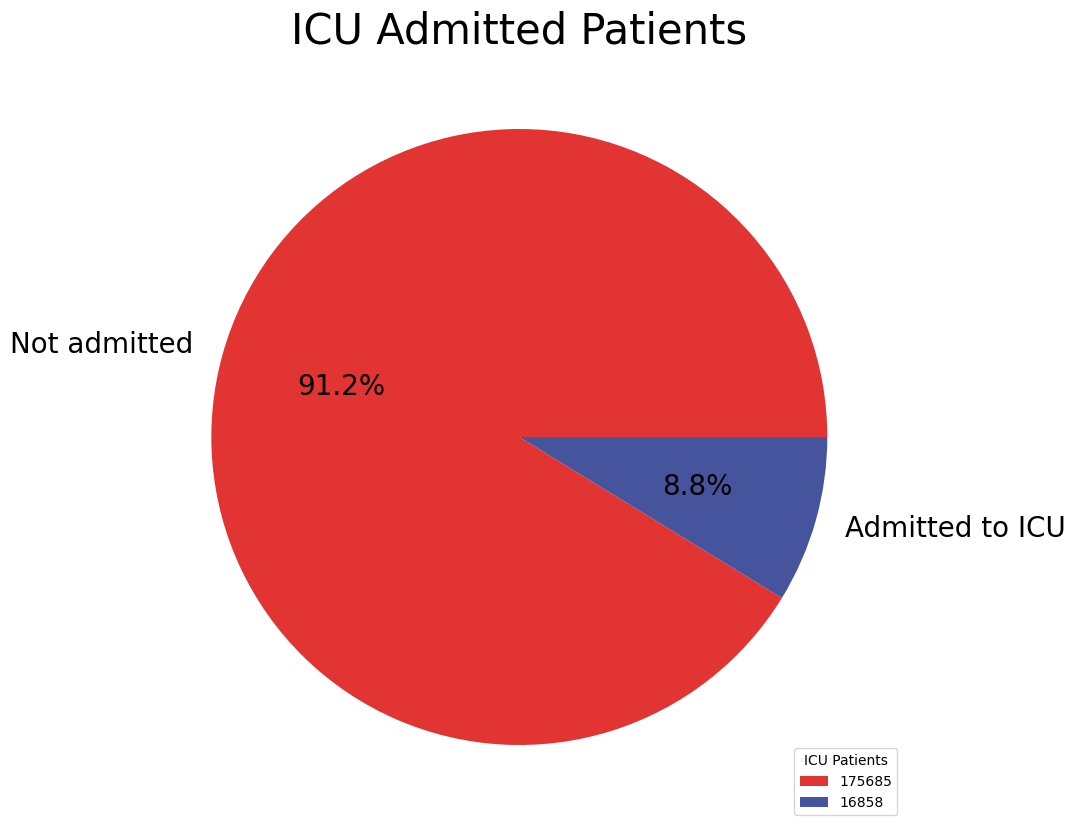

In [91]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

There are 16858 patients who had been admitted to the ICU with a percentage of 8.8% out of the total hospitalized patients

##15.How many of those ICU admitted patients had been classified with Covid?

In [92]:
df[(df['CLASIFFICATION_FINAL'] < 4) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED,Covid_or_Not
16,2,1,1,2,9999-99-99,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
20,2,1,2,2,9999-99-99,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,A Covid 19 Carrier
41,2,1,2,2,9999-99-99,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
340,1,3,2,2,06/04/2020,1.0,1.0,90.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
341,1,3,2,2,07/04/2020,1.0,1.0,61.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,A Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047735,1,13,2,2,9999-99-99,1.0,1.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047737,1,13,2,2,9999-99-99,2.0,2.0,56.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047740,1,13,2,2,9999-99-99,2.0,1.0,68.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier
1047750,1,13,2,2,9999-99-99,1.0,2.0,35.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,A Covid 19 Carrier


There are 6409 patients with no Covid 19 that had been admitted to an Intensive Care Unit, maybe due to other illnesses or diseases.

In [93]:
df[(df['ICU'] == 1)]['CLASIFFICATION_FINAL'].value_counts()

3    10097
7     4951
6      953
5      465
1      255
2       97
4       40
Name: CLASIFFICATION_FINAL, dtype: int64

As expected patients with classification of the 3rd degree are the majority, and we can also notice that patients with covid are much more than non carriers.

In [94]:
df[(df['ICU'] == 1)]['Covid_or_Not'].value_counts()

A Covid 19 Carrier        10449
Not a Covid 19 Carrier     6409
Name: Covid_or_Not, dtype: int64

We' ve got 10,449 patients who were carriers of Covid among the ICU

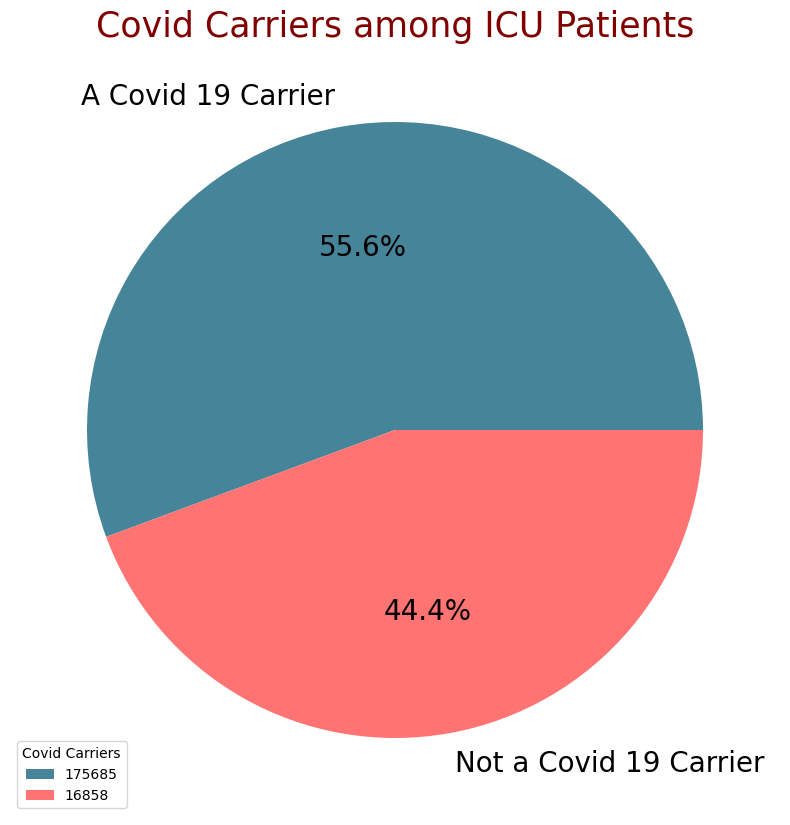

In [95]:
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

We can see the huge percentage of the Covid carriers (91.2%) among the ICU admitted patients

##16.How many of those ICU patients have died?

In [96]:
df[(df['ICU'] == 1)]['DIED'].value_counts()

0    8663
1    8195
Name: DIED, dtype: int64

We' ve got 8,195 dead patients among the ICU.

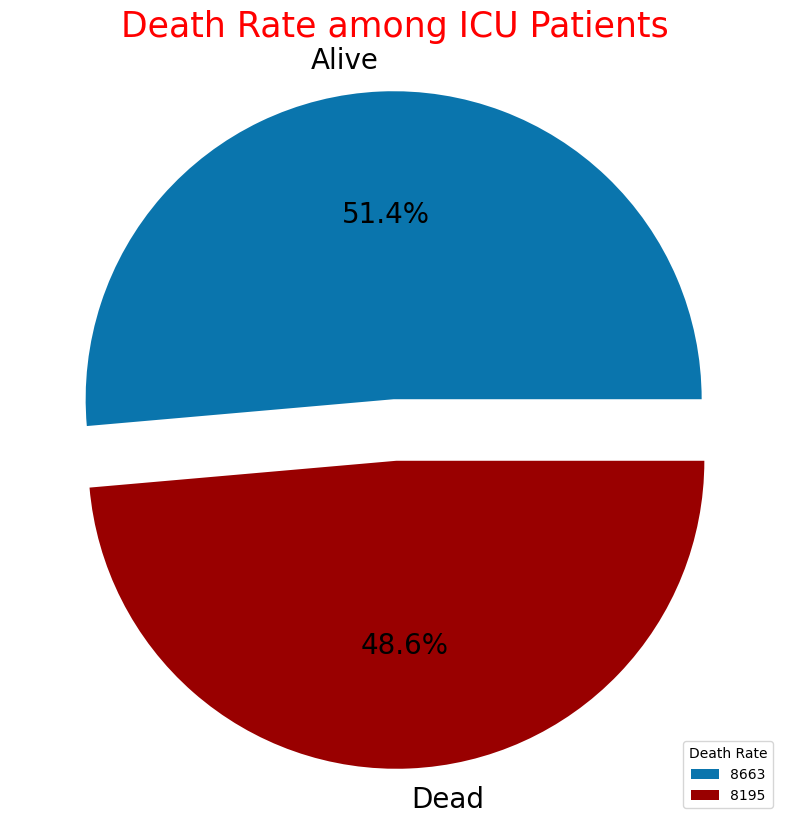

In [97]:
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DIED'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DIED'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

Unfortantely about 48.6% of ICU admitted patients have died which is a great percentage, indicating the great losses we found at the ICU; because ICU patients are always at great risk and degrading medical conditions.

In [98]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'Covid_or_Not'],
      dtype='object')

#5.Modeling


In [99]:
df_model = df.drop(columns=['SEX'])

In [100]:
df_model.dropna().shape

(1019473, 22)

In [101]:
df_model.shape

(1048575, 22)

In [102]:
df_model.dropna(inplace = True)

In [103]:
df_model.Covid_or_Not.value_counts()

Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: Covid_or_Not, dtype: int64

In [104]:
df_model.dropna(inplace = True)

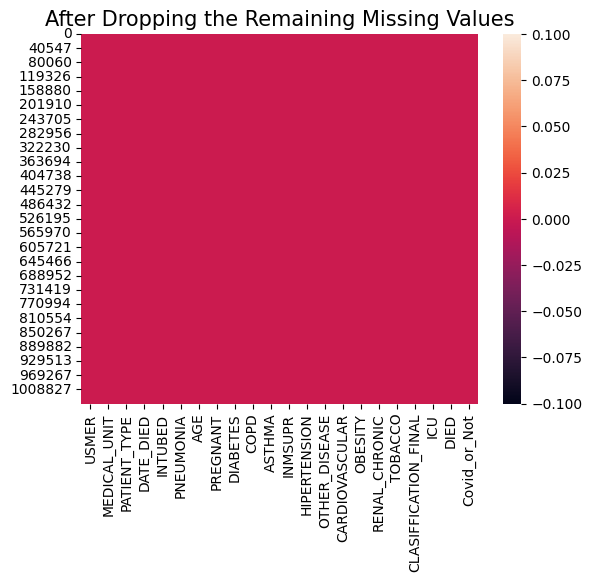

In [105]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

In [106]:
df_model.Covid_or_Not.value_counts()

Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: Covid_or_Not, dtype: int64

In [107]:
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=="Not a Covid 19 Carrier" else 1)

<ipython-input-108-42e5463bdace>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df.corr()))
<ipython-input-108-42e5463bdace>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)


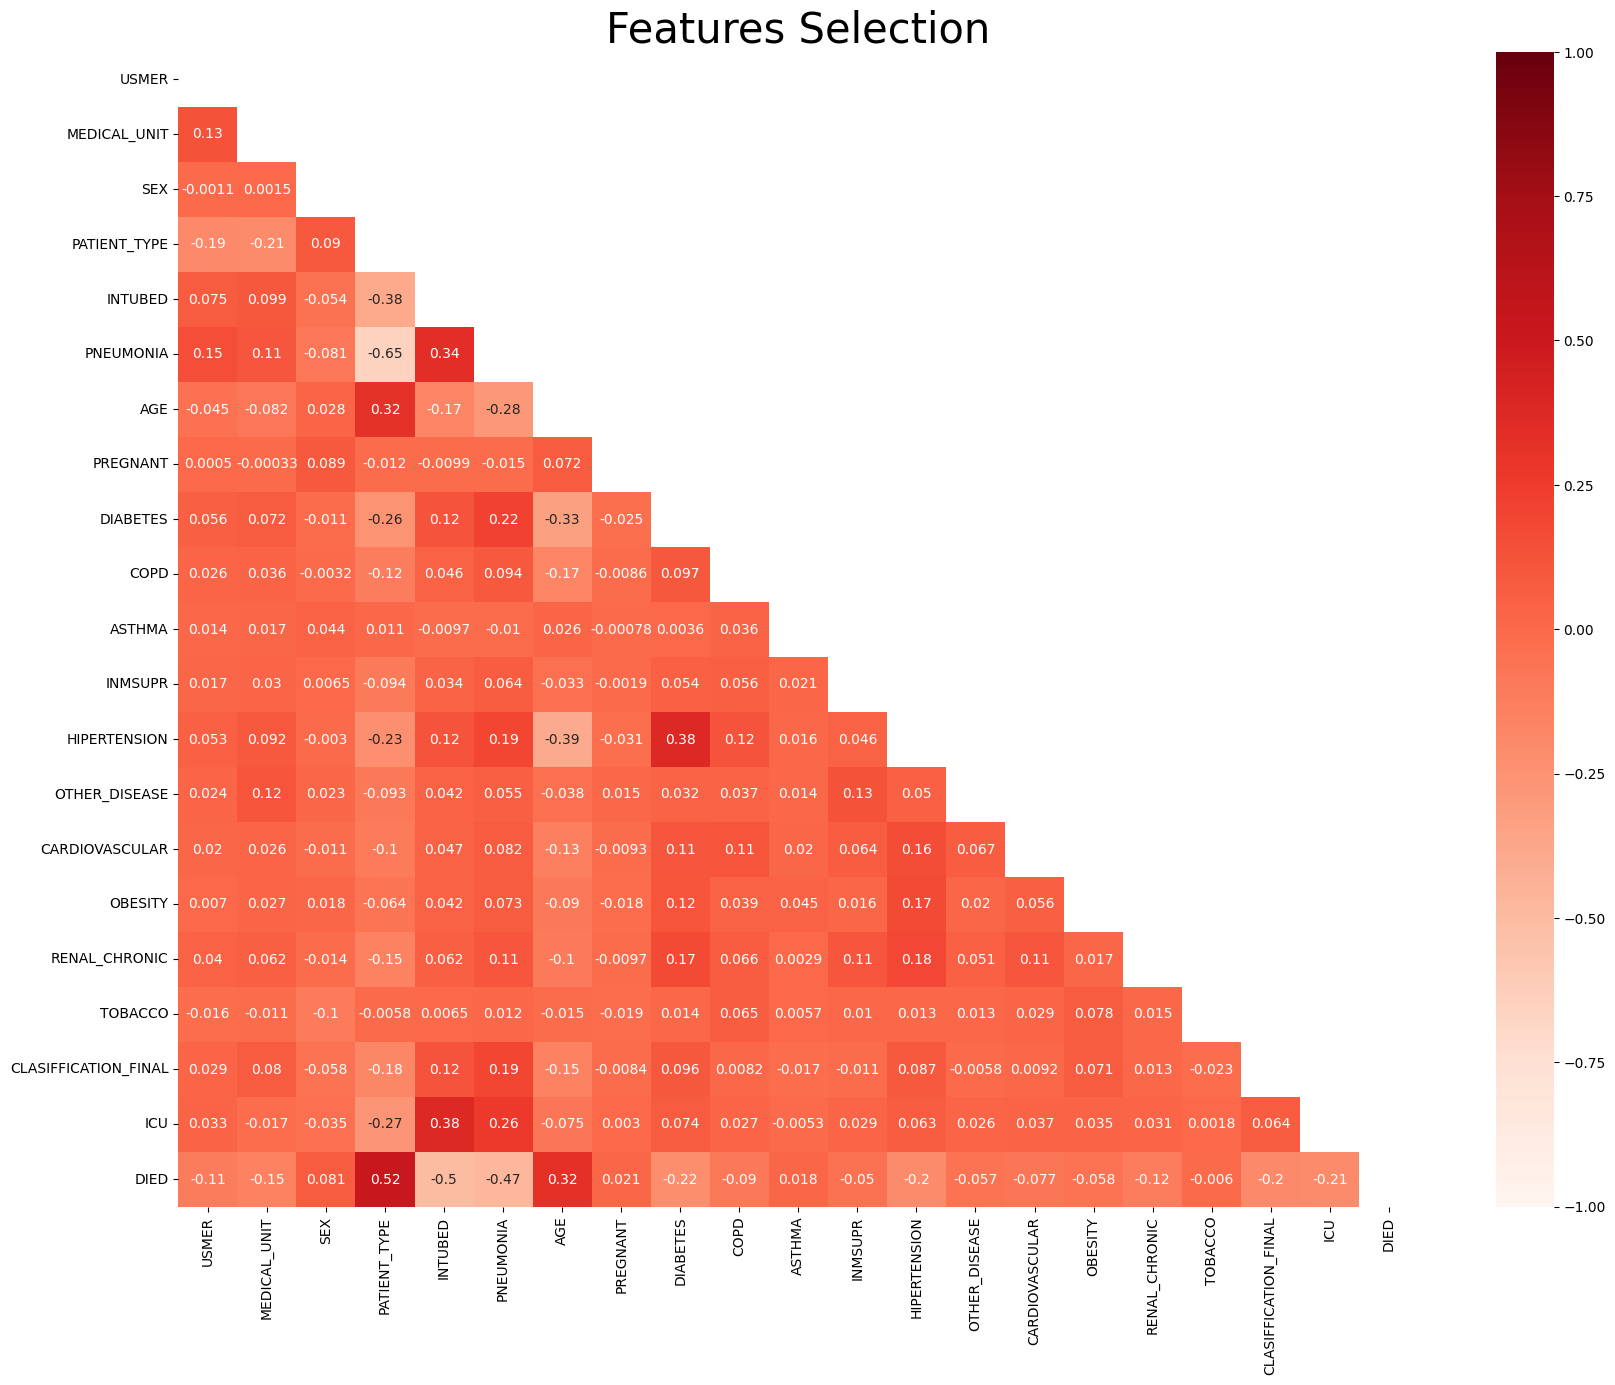

In [108]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [109]:
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

In [110]:
X = df_model.drop(['DIED','DATE_DIED'] , axis= 1)
Y = df_model['DIED']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

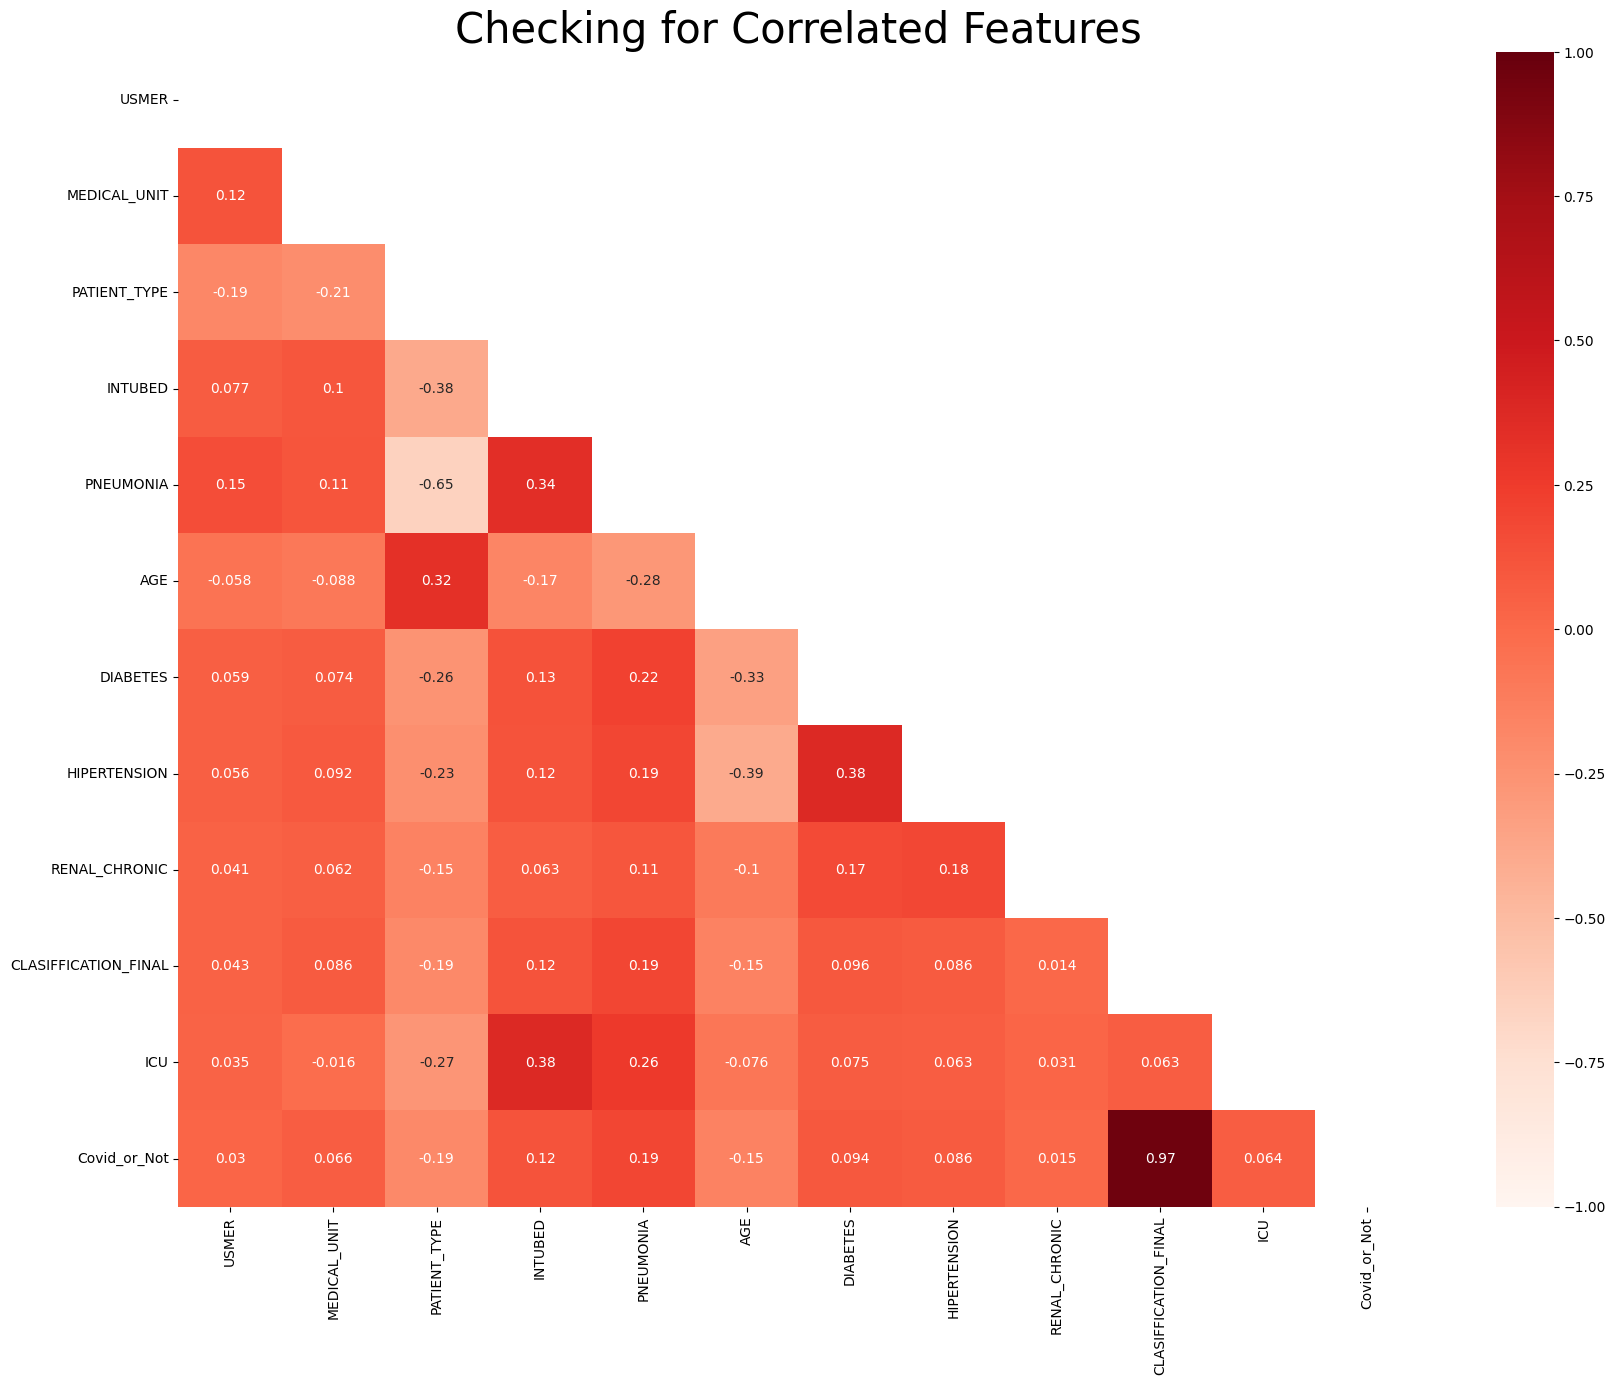

In [112]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

In [113]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [114]:
print(correlation(X_train, 0.7))

{'Covid_or_Not'}


In [115]:
X_train.drop('Covid_or_Not',axis=1, inplace = True)
X_test.drop('Covid_or_Not',axis=1, inplace = True)

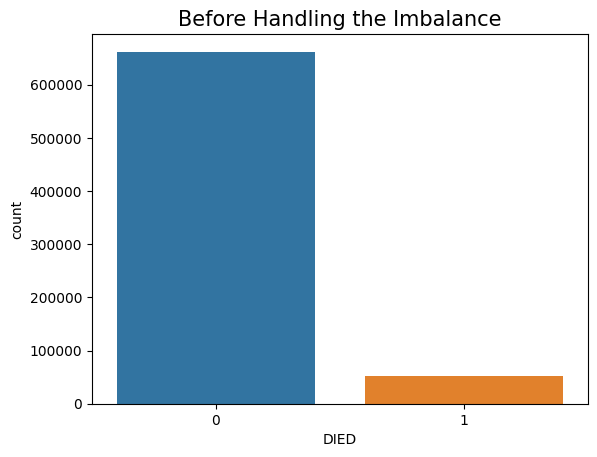

In [116]:
#Checking for data balance
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [117]:
# y_train = y_train.values

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

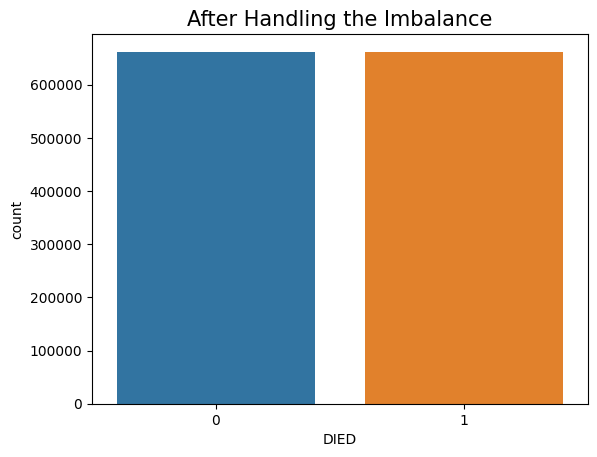

In [118]:
# Let's check our data again:
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [119]:
from sklearn.metrics import roc_curve

# Function that draws an ROC curve
def roc(model, lbl = "Logistic Regression"):
    # Probabilities
    logreg_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, logreg_pred_proba[:,1])
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr, tpr, label = lbl)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(lbl + " ROC Curve")
    plt.show()

In [120]:
from sklearn.metrics import accuracy_score
#Random forest
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(X_train,y_train)

y_rf_pred1 = rf.predict(X_train)
y_rf_pred2 = rf.predict(X_test)
rfTrainAccuracy = accuracy_score(y_train,y_rf_pred1)
rfTestAccuracy = accuracy_score(y_test,y_rf_pred2)
print("Random Forest Train Accuracy: ", rfTrainAccuracy, "\n")
print("Random Forest Forest Test Accuracy: ", rfTestAccuracy)


Random Forest Train Accuracy:  0.9516813290541816 

Random Forest Forest Test Accuracy:  0.9156525264679148


In [121]:
Classes = ['Not Dead', 'Dead']
print("Random Forest Classification Report:", "\n",classification_report(y_test, y_rf_pred2, target_names = Classes))

Random Forest Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.98      0.93      0.95    284090
        Dead       0.45      0.78      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.71      0.85      0.76    305842
weighted avg       0.94      0.92      0.93    305842



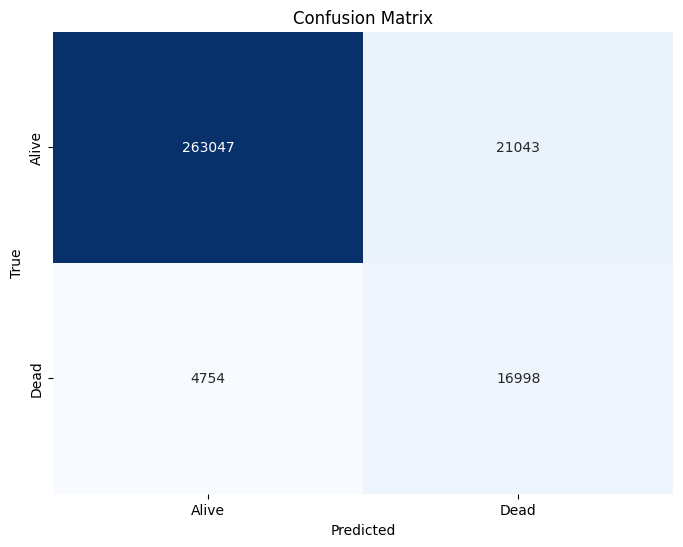

In [122]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_rf_pred2)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

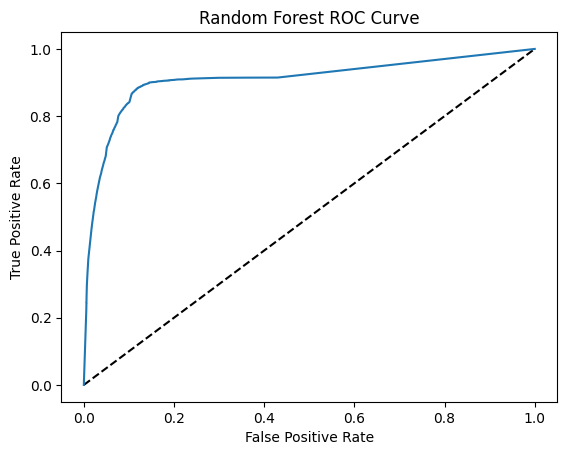

In [123]:
roc(rf, "Random Forest")

In [129]:
#XGBoost
XGB = XGBClassifier()
XGB.fit(X_train , y_train)
y_xg_pred1 = XGB.predict(X_train)
y_xg_pred2 = XGB.predict(X_test)
xgTrainAccuracy = accuracy_score(y_train,y_xg_pred1)
xgTestAccuracy = accuracy_score(y_test,y_xg_pred2)
print("XGBoost Train Accuracy: ", xgTrainAccuracy, "\n")
print("XGBoost Test Accuracy: ", xgTestAccuracy)

XGBoost Train Accuracy:  0.9342616575420049 

XGBoost Test Accuracy:  0.9072037195676199


In [125]:
print("XGBoost Classification Report:", "\n",classification_report(y_test, XGB.predict(X_test), target_names = Classes))

XGBoost Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.91      0.95    284090
        Dead       0.43      0.90      0.58     21752

    accuracy                           0.91    305842
   macro avg       0.71      0.91      0.76    305842
weighted avg       0.95      0.91      0.92    305842



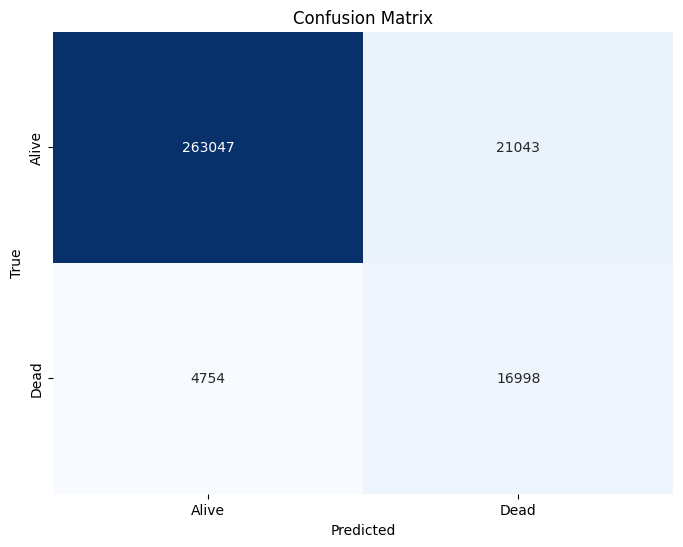

In [126]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_xg_pred2)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

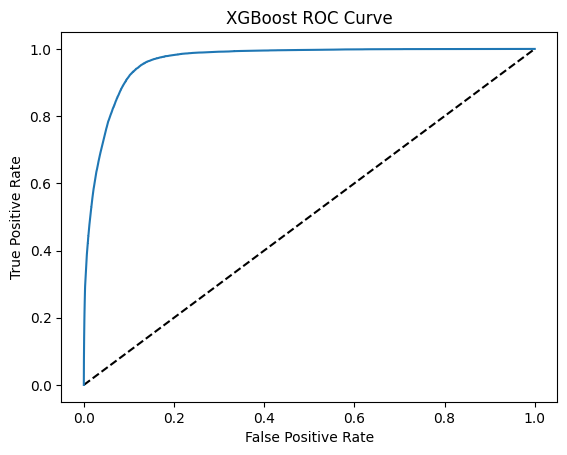

In [127]:
roc(XGB, "XGBoost")

#6.Conclusion

- Unfortunately 7.3% of the total patients have died, with about 70.5% of them were Covid Carriers.

- As for the total carriers they were about 37.5% out of the total patients.

- About 14% of those carriers have died.

- We found that age has a significant impact; as it increases chances of getting the virus increases.

- We also found that people who are suffering from obesity are more likely to carry the virus.

- As for pregnancy, we couldn't find any impact on Covid classification.

- We noticed that patients with "Pneumonia", "Hypertension", "Diabetes" and tobacco users have a great chance of getting the virus with "Pneumonia" patients being the most.

- We also noticed that there's a positive correlation between having "Hypertension" and "Diabetes" diseases; as most patients with one of those two diseases are subjected to get the other.

- We saw that among all the patients of these diseases the patients classified with 3rd degree of Covid are the highest by far.

- About 19% of the total patients were hospitalized, with a death percentage of 35%.

- The "Pneumonia" disease has the greatest impact on that percentage (35%).

- About 91% of the dead patients were hospitalized.

- About 9% out of the hospitalized patients were admitted to the ICU, with about 56% of them being classified as Covid carriers, and with a great percentage of death of about 49%.
